In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ar_properties.csv")

In [ ]:
df.shape

(1000000, 25)

In [ ]:
df.size

25000000

In [ ]:
df.columns

Index(['id', 'ad_type', 'start_date', 'end_date', 'created_on', 'lat', 'lon',
       'l1', 'l2', 'l3', 'l4', 'l5', 'l6', 'rooms', 'bedrooms', 'bathrooms',
       'surface_total', 'surface_covered', 'price', 'currency', 'price_period',
       'title', 'description', 'property_type', 'operation_type'],
      dtype='object')

In [ ]:
df["ad_type"].unique()

array(['Propiedad'], dtype=object)

In [ ]:
df1=df.drop(columns=['ad_type','start_date','end_date','created_on','price_period'])

In [ ]:
df=df1.drop(columns=['id','l1','l2','l3','l4','l5','l6','title','description','lat','lon'])

In [ ]:
df=df[df['operation_type']=="Venta"]
df=df.drop(columns=['operation_type','currency'])

In [ ]:
df.shape

(782122, 7)

In [ ]:
df.size

5474854

In [ ]:
df.columns

Index(['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'property_type'],
      dtype='object')

In [ ]:
df.head(25)

rooms  bedrooms  bathrooms  surface_total  surface_covered      price  \
0     NaN       NaN        NaN          350.0            350.0        NaN   
1     NaN       NaN        NaN         1541.0           1541.0        NaN   
2     NaN       NaN        NaN         1000.0           1000.0        NaN   
3     NaN       NaN        NaN         1000.0           1000.0        NaN   
4     NaN       NaN        NaN        18164.0          18164.0        NaN   
5     NaN       NaN        6.0            NaN           1980.0        NaN   
9     NaN       1.0        NaN            NaN              NaN        NaN   
12    1.0       1.0        1.0           38.0             38.0        NaN   
19    3.0       1.0        1.0           63.0             49.0        NaN   
21    3.0       2.0        1.0           85.0             85.0        NaN   
22    3.0       2.0        1.0           51.0             51.0        NaN   
24    4.0       3.0        3.0          171.0            171.0        NaN   
27    9.0       4.0        5.0         2815.0            459.0        NaN   
28    NaN       NaN        NaN          324.0            324.0  2000000.0   
29    NaN       NaN        NaN          250.0            250.0   780000.0   
30    NaN       NaN        NaN          360.0            360.0  1650000.0   
60    6.0       2.0        1.0          250.0            130.0  4000000.0   
64    NaN       4.0        3.0            NaN            280.0   280000.0   
65    NaN       NaN        NaN            NaN              NaN    38000.0   
66    NaN       NaN        NaN            NaN              NaN    80000.0   
67    NaN       NaN        NaN          336.0            197.0   126000.0   
68    NaN       NaN        NaN          790.0            790.0    23500.0   
69    NaN       NaN        NaN          467.0            467.0    42000.0   
70    NaN       NaN        NaN          420.0            420.0    12900.0   
71    NaN       NaN        NaN          116.0              NaN   259000.0   

   property_type  
0           Lote  
1           Lote  
2           Lote  
3           Lote  
4           Otro  
5        Oficina  
9   Departamento  
12  Departamento  
19  Departamento  
21  Departamento  
22  Departamento  
24  Departamento  
27          Casa  
28          Lote  
29          Lote  
30          Lote  
60          Casa  
64          Casa  
65          Lote  
66          Lote  
67          Lote  
68          Lote  
69          Lote  
70          Lote  
71          Lote

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 782122 entries, 0 to 999982
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   rooms            385134 non-null  float64
 1   bedrooms         347387 non-null  float64
 2   bathrooms        589097 non-null  float64
 3   surface_total    271394 non-null  float64
 4   surface_covered  264984 non-null  float64
 5   price            755922 non-null  float64
 6   property_type    782122 non-null  object 
dtypes: float64(6), object(1)
memory usage: 47.7+ MB


In [ ]:
percentage=df.isnull().sum()*100/len(df.index)
percentage

rooms              50.757810
bedrooms           55.584039
bathrooms          24.679654
surface_total      65.300298
surface_covered    66.119864
price               3.349861
property_type       0.000000
dtype: float64

In [ ]:
df = df.dropna(subset=['price'])

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder



y=df['price']

preprocessor=ColumnTransformer(
    transformers=[
        ('tf1', OneHotEncoder(sparse_output=False, drop='first'),['property_type'])
    ],
    remainder='passthrough'
)

df_transformed=preprocessor.fit_transform(df)

feature_names=preprocessor.get_feature_names_out()
df_encoded=pd.DataFrame(df_transformed, columns=feature_names)

df_encoded.head(25)


tf1__property_type_Casa de campo  tf1__property_type_Cochera  \
0                                0.0                         0.0   
1                                0.0                         0.0   
2                                0.0                         0.0   
3                                0.0                         0.0   
4                                0.0                         0.0   
5                                0.0                         0.0   
6                                0.0                         0.0   
7                                0.0                         0.0   
8                                0.0                         0.0   
9                                0.0                         0.0   
10                               0.0                         0.0   
11                               0.0                         0.0   
12                               0.0                         0.0   
13                               0.0                         0.0   
14                               0.0                         0.0   
15                               0.0                         0.0   
16                               0.0                         0.0   
17                               0.0                         0.0   
18                               0.0                         0.0   
19                               0.0                         0.0   
20                               0.0                         0.0   
21                               0.0                         1.0   
22                               0.0                         1.0   
23                               0.0                         1.0   
24                               0.0                         0.0   

    tf1__property_type_Departamento  tf1__property_type_Depósito  \
0                               0.0                          0.0   
1                               0.0                          0.0   
2                               0.0                          0.0   
3                               0.0                          0.0   
4                               0.0                          0.0   
5                               0.0                          0.0   
6                               0.0                          0.0   
7                               0.0                          0.0   
8                               0.0                          0.0   
9                               0.0                          0.0   
10                              0.0                          0.0   
11                              0.0                          0.0   
12                              0.0                          0.0   
13                              0.0                          0.0   
14                              0.0                          0.0   
15                              0.0                          0.0   
16                              0.0                          0.0   
17                              0.0                          0.0   
18                              0.0                          0.0   
19                              0.0                          0.0   
20                              0.0                          0.0   
21                              0.0                          0.0   
22                              0.0                          0.0   
23                              0.0                          0.0   
24                              0.0                          0.0   

    tf1__property_type_Local comercial  tf1__property_type_Lote  \
0                                  0.0                      1.0   
1                                  0.0                      1.0   
2                                  0.0                      1.0   
3                                  0.0                      0.0   
4                                  0.0                      0.0   
5                                  0.0                      1.0 

In [ ]:
columns=['remainder__rooms','remainder__bedrooms','remainder__bathrooms','remainder__surface_total','remainder__surface_covered','remainder__price']

df_cleaned=df_encoded[(df_encoded[columns]>=0).all(axis=1)]

df_cleaned.size

2029500

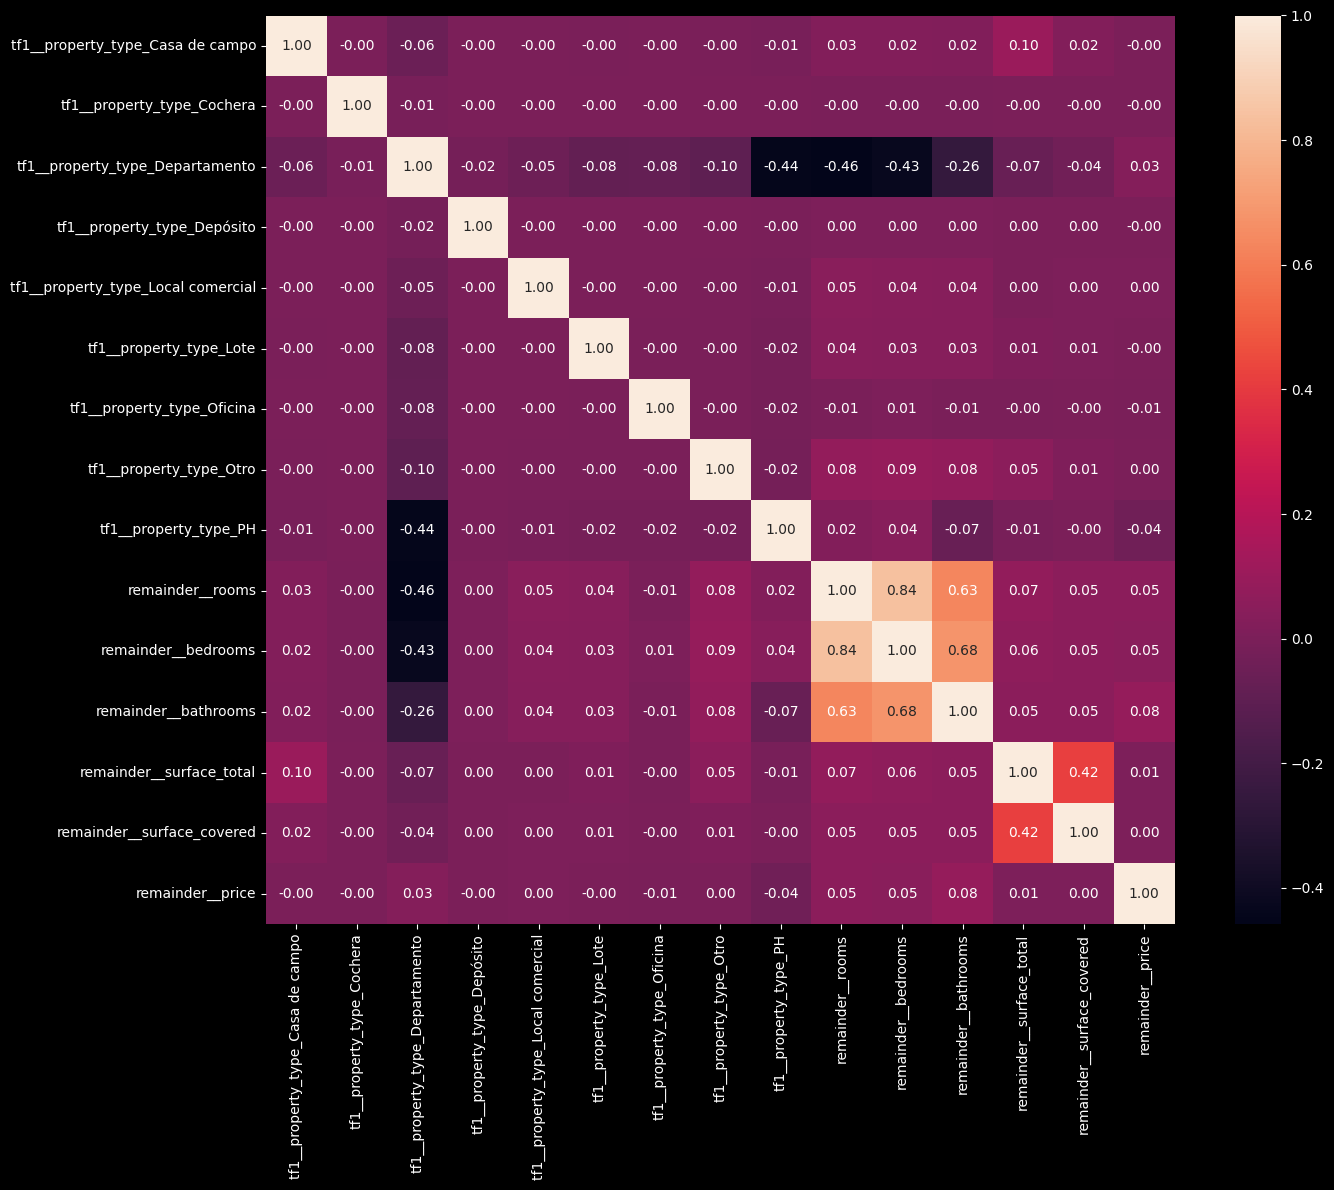

In [ ]:
plt.style.use("dark_background")
correlation_matrix=df_cleaned.corr()
plt.figure(figsize=(15,12))
sns.heatmap(correlation_matrix,annot=True,fmt=".2f",square=True,cbar=True)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
iterative=['remainder__rooms','remainder__bedrooms','remainder__bathrooms']
median=['remainder__surface_total','remainder__surface_covered']

df_imputed=df_cleaned.copy()
for column in median:
    median_value=df_imputed[column].median()
    df_imputed[column].fillna(median_value, inplace=True)
iterative_imputer=IterativeImputer(max_iter=10,random_state=0)
df_imputed[iterative]=iterative_imputer.fit_transform(df_imputed[iterative])



<ipython-input-24-022f68cb9ae5>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_imputed[column].fillna(median_value, inplace=True)


In [ ]:
percentage=df_imputed.isnull().sum()*100/len(df_imputed.index)
percentage

tf1__property_type_Casa de campo      0.0
tf1__property_type_Cochera            0.0
tf1__property_type_Departamento       0.0
tf1__property_type_Depósito           0.0
tf1__property_type_Local comercial    0.0
tf1__property_type_Lote               0.0
tf1__property_type_Oficina            0.0
tf1__property_type_Otro               0.0
tf1__property_type_PH                 0.0
remainder__rooms                      0.0
remainder__bedrooms                   0.0
remainder__bathrooms                  0.0
remainder__surface_total              0.0
remainder__surface_covered            0.0
remainder__price                      0.0
dtype: float64

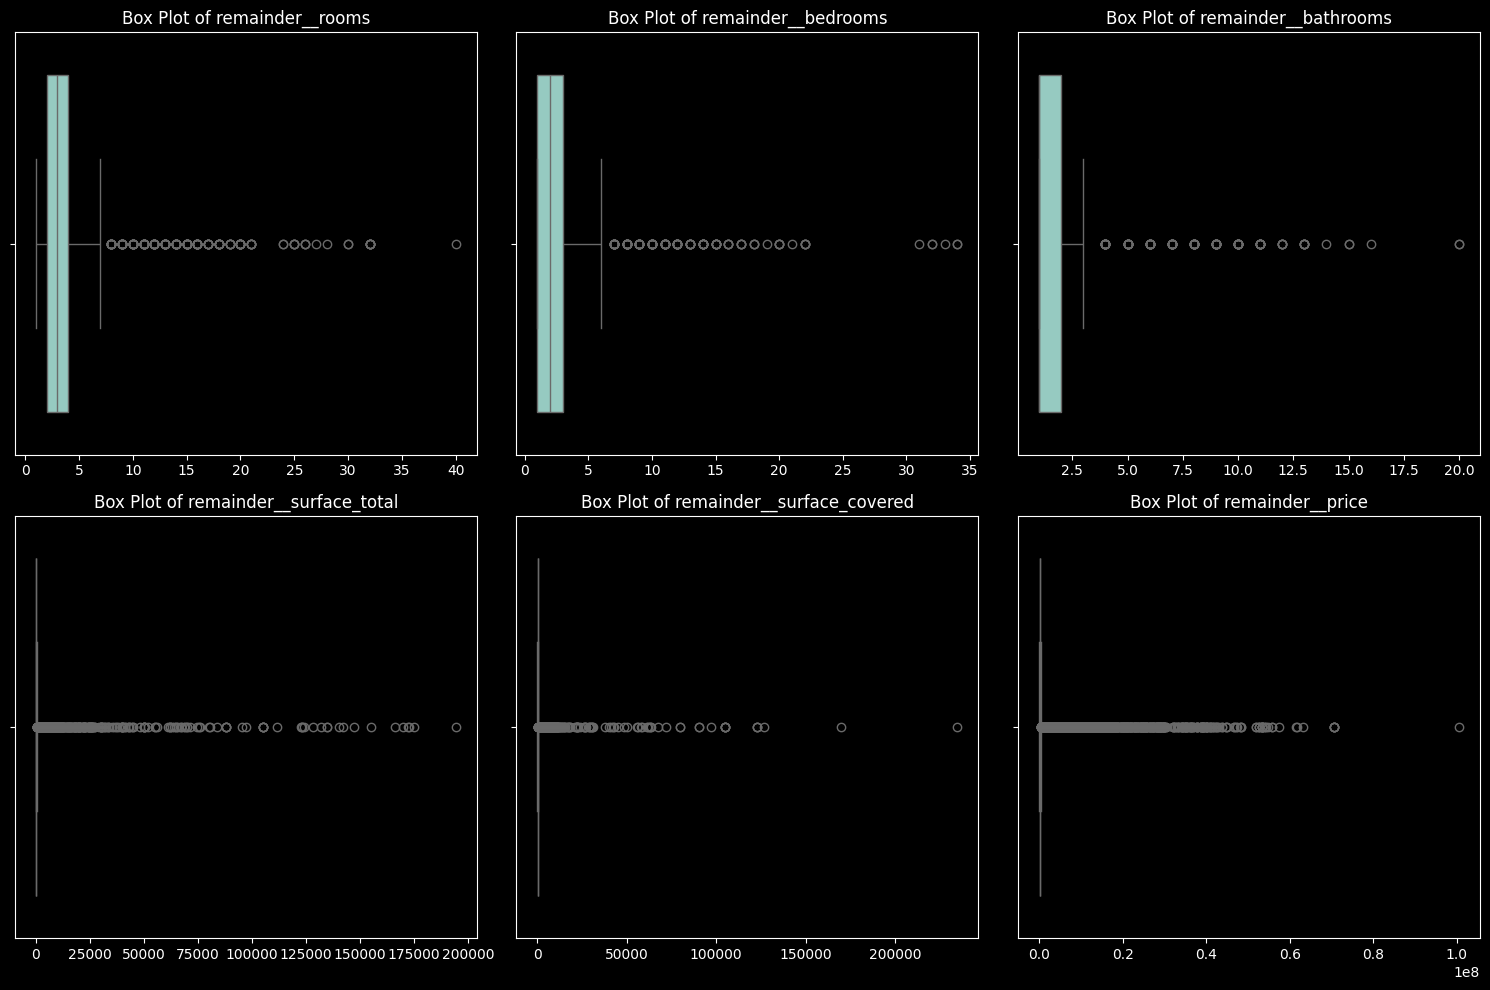

In [ ]:

outlier_columns=['remainder__rooms','remainder__bedrooms','remainder__bathrooms','remainder__surface_total','remainder__surface_covered','remainder__price']
plt.figure(figsize=(15,10))
for i,column in enumerate(outlier_columns,1):
    plt.subplot(2,3,i)
    sns.boxplot(data=df_imputed,x=column)
    plt.title(f'Box Plot of {column}')
    plt.xlabel('')

plt.tight_layout()
plt.show()


In [ ]:
df_outlier=df_imputed.copy()
def cap_outliers(df,columns):
    for column in columns:
        Q1=df[column].quantile(0.25)
        Q3=df[column].quantile(0.75)
        IQR=Q3-Q1
        lower_bound=Q1-(1.5*IQR)
        upper_bound=Q3+(1.5*IQR)
        df[column]=np.where(df[column]<lower_bound,lower_bound,df[column])
        df[column]=np.where(df[column]>upper_bound,upper_bound,df[column])

cap_outliers(df_outlier, outlier_columns)


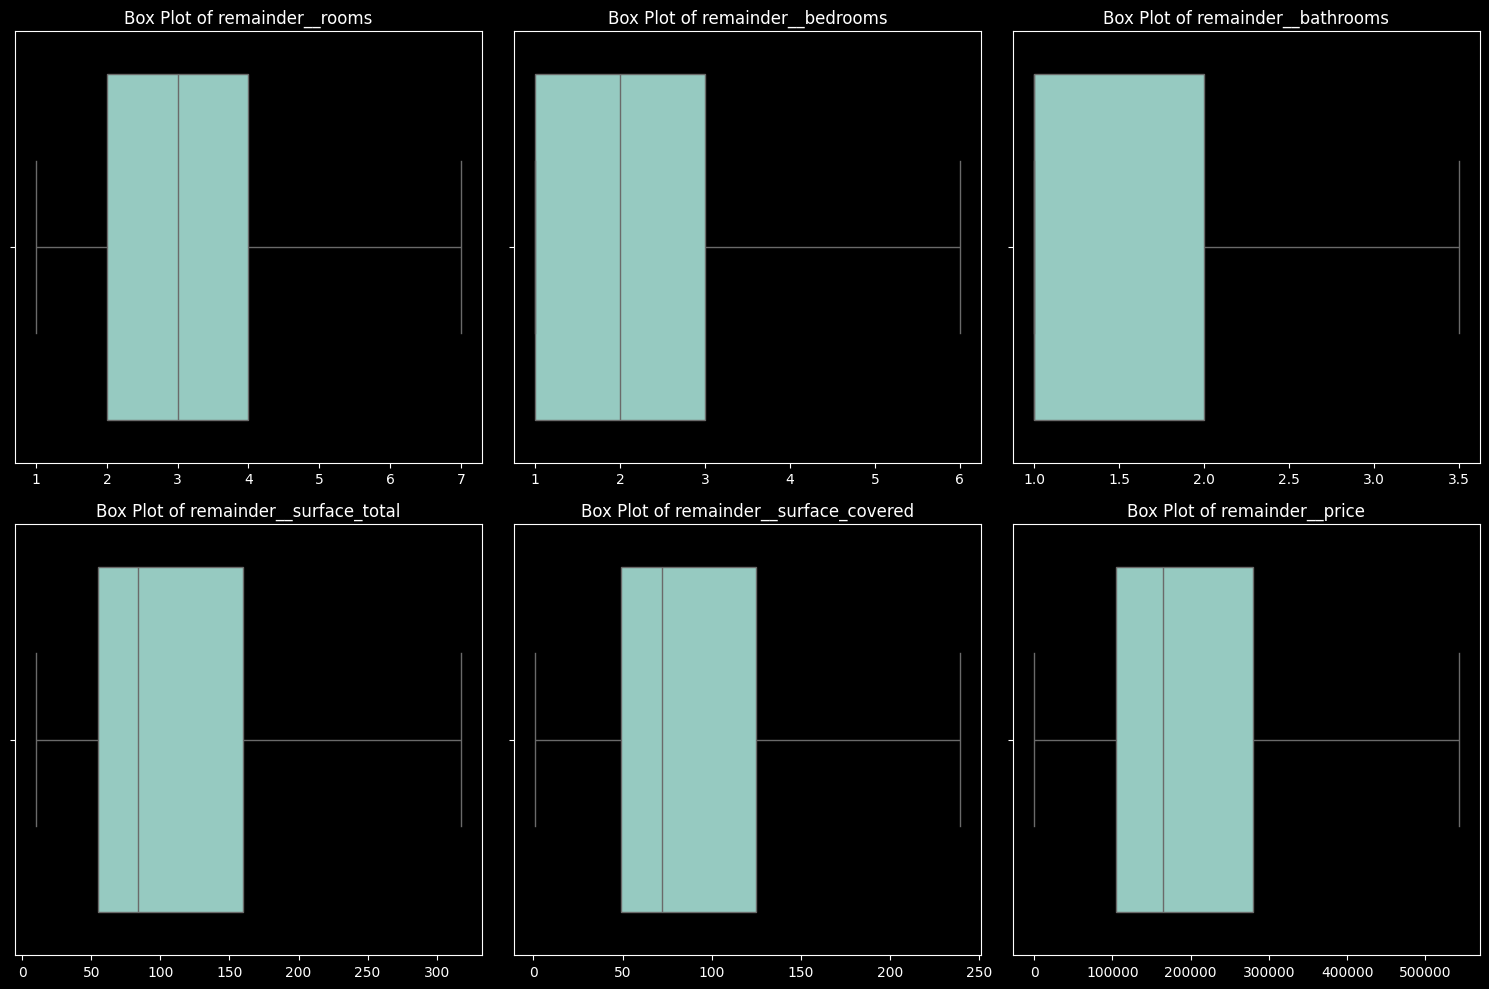

In [ ]:

plt.figure(figsize=(15,10))
for i, column in enumerate(outlier_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df_outlier, x=column)
    plt.title(f'Box Plot of {column}')
    plt.xlabel('')

plt.tight_layout()
plt.show()


In [ ]:
df_outlier[outlier_columns].describe()

remainder__rooms  remainder__bedrooms  remainder__bathrooms  \
count     135300.000000        135300.000000         135300.000000   
mean           3.299002             2.165639              1.606293   
std            1.393600             1.084262              0.793577   
min            1.000000             1.000000              1.000000   
25%            2.000000             1.000000              1.000000   
50%            3.000000             2.000000              1.000000   
75%            4.000000             3.000000              2.000000   
max            7.000000             6.000000              3.500000   

       remainder__surface_total  remainder__surface_covered  remainder__price  
count             135300.000000               135300.000000     135300.000000  
mean                 120.533899                   95.785772     214562.811042  
std                   88.179388                   61.973955     147380.686103  
min                   10.000000                    1.000000          0.000000  
25%                   55.000000                   49.000000     105000.000000  
50%                   84.000000                   72.000000     165000.000000  
75%                  160.000000                  125.000000     280000.000000  
max                  317.500000                  239.000000     542500.000000

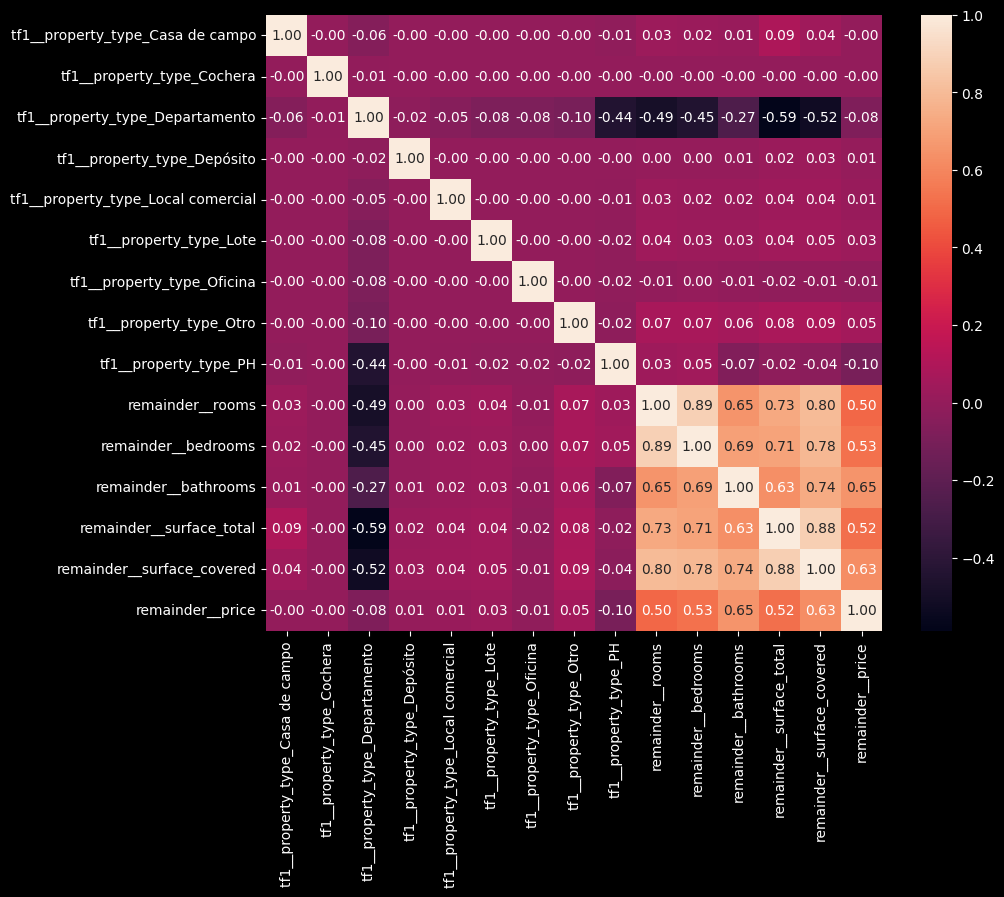

In [ ]:
correlation_matrix=df_outlier.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,fmt=".2f",square=True)
plt.show()

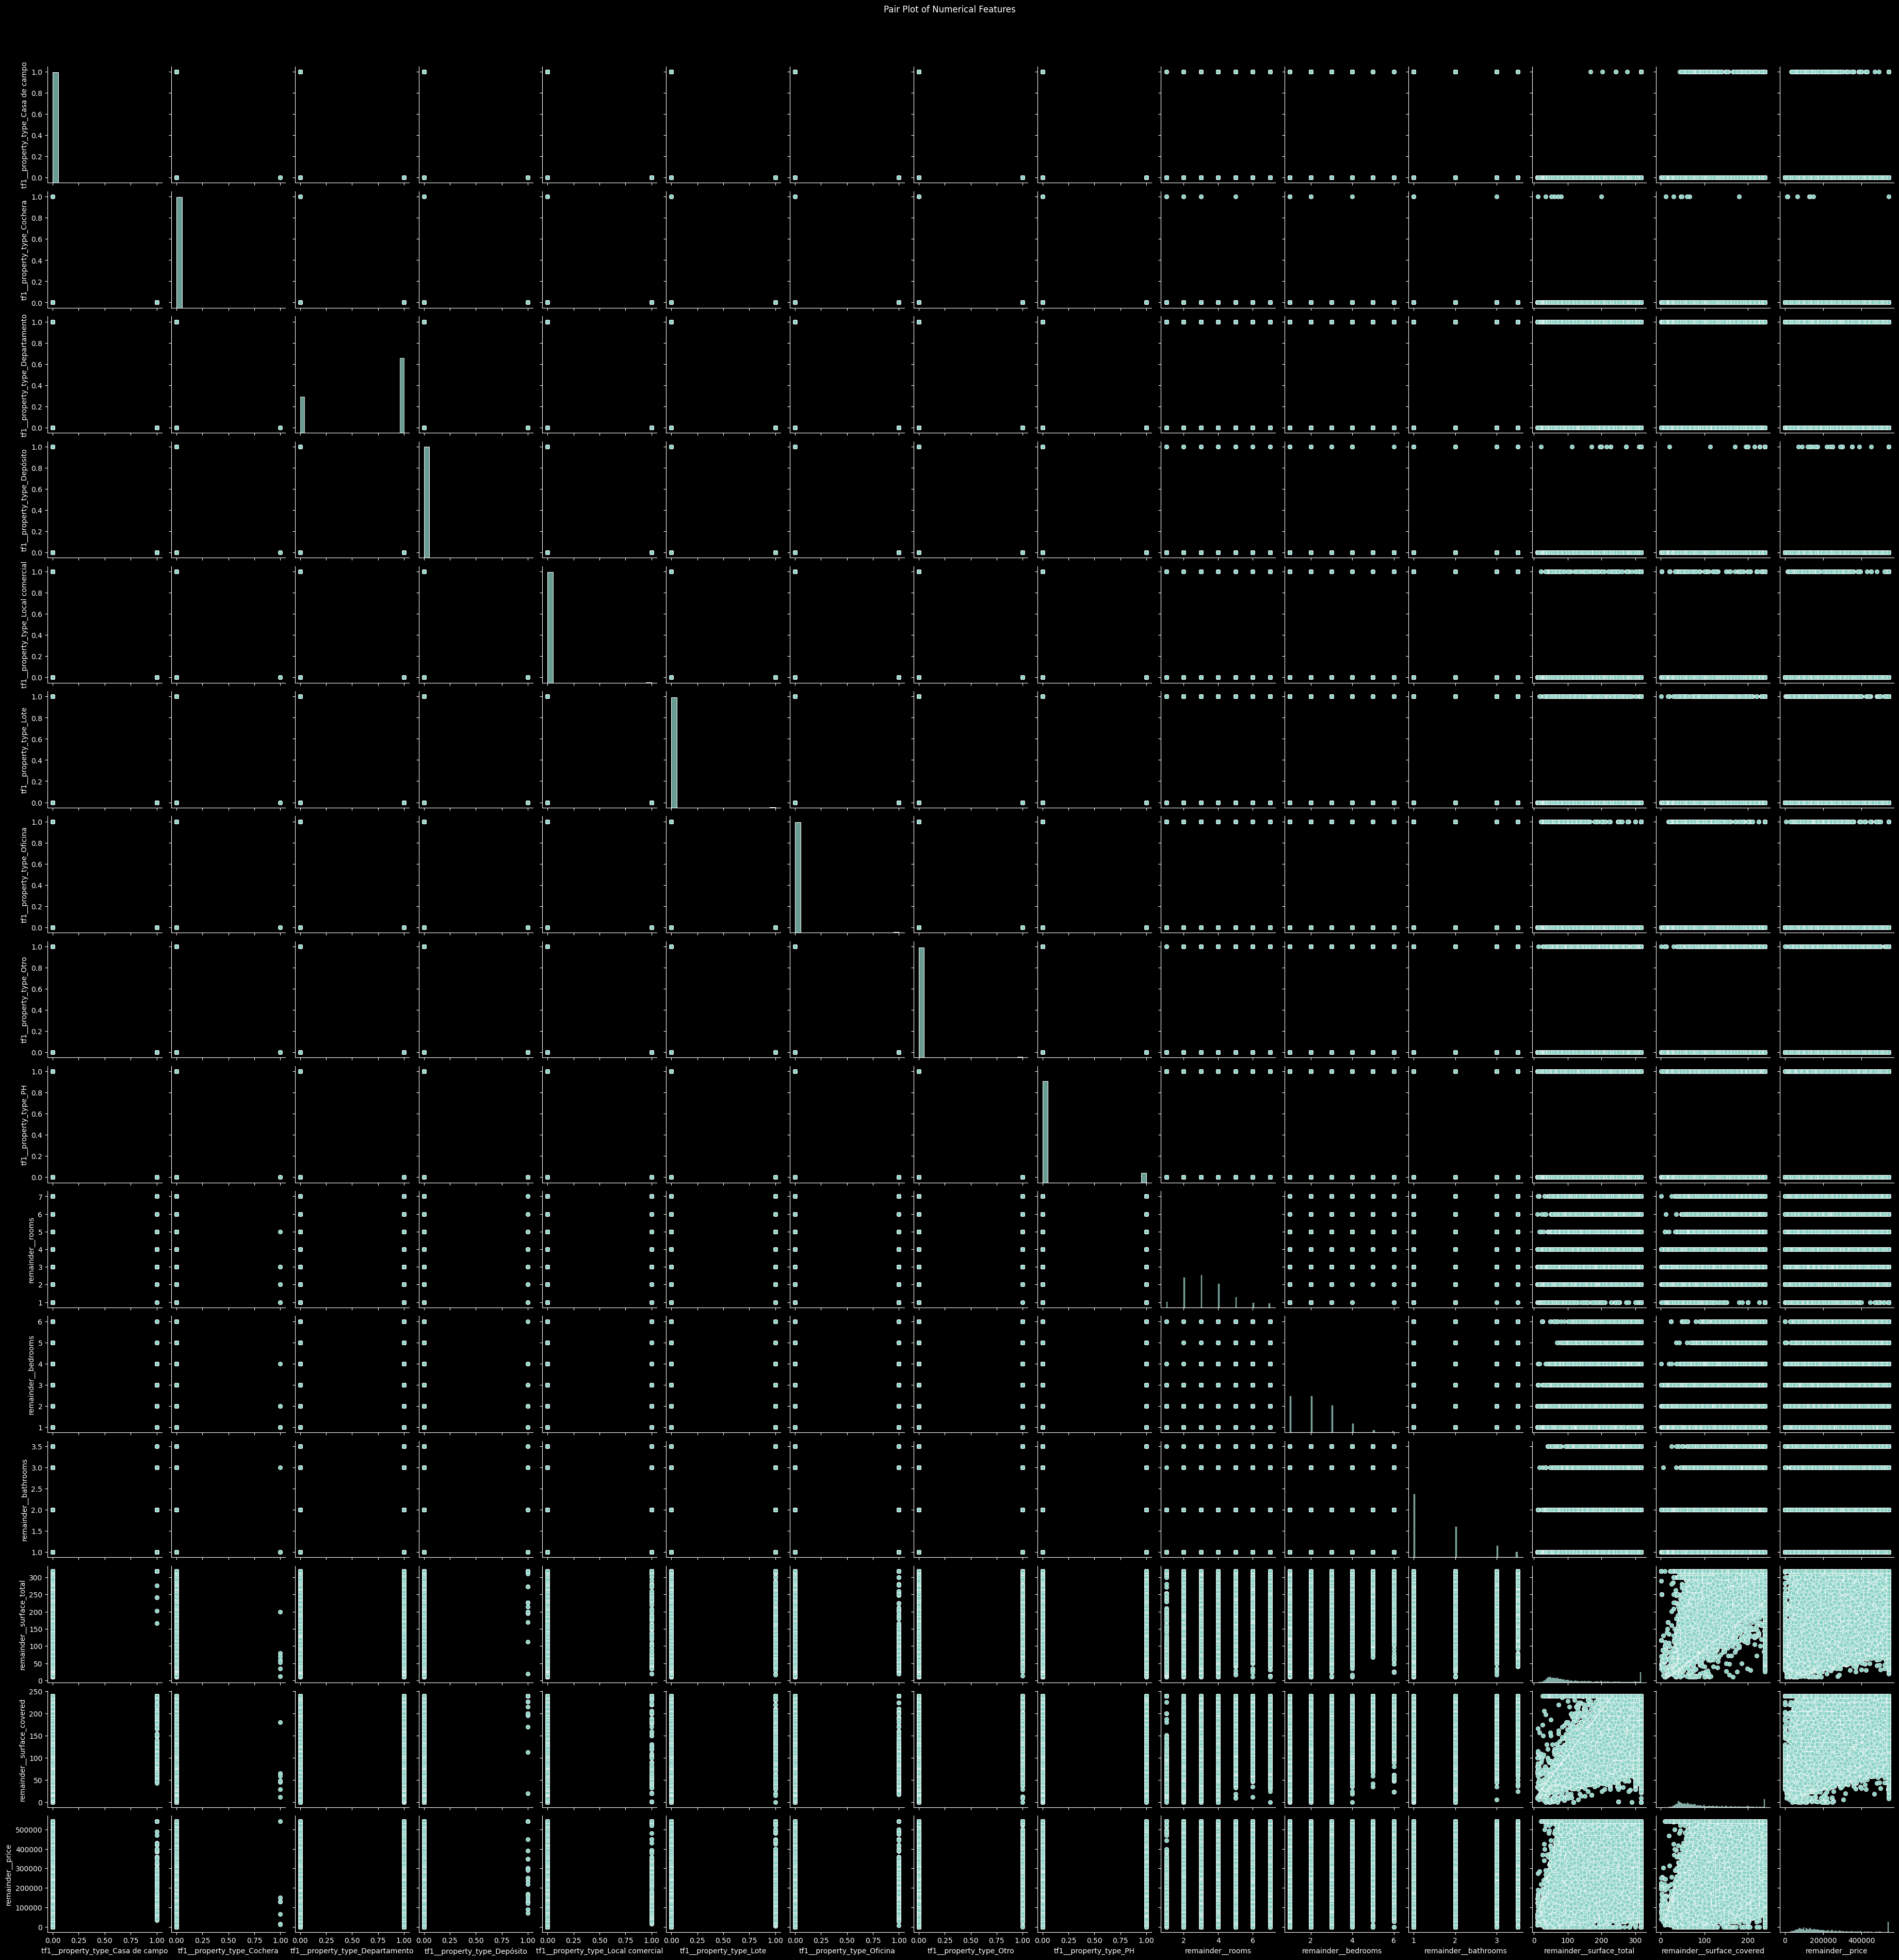

In [ ]:
sns.pairplot(df_outlier)
plt.suptitle("Pair Plot of Numerical Features", y=1.02)
plt.show()

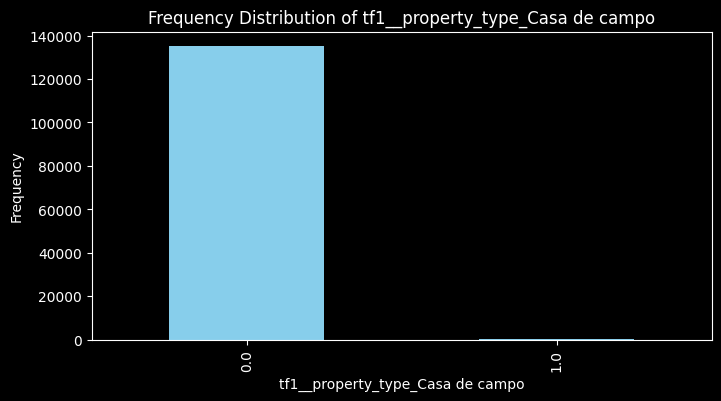

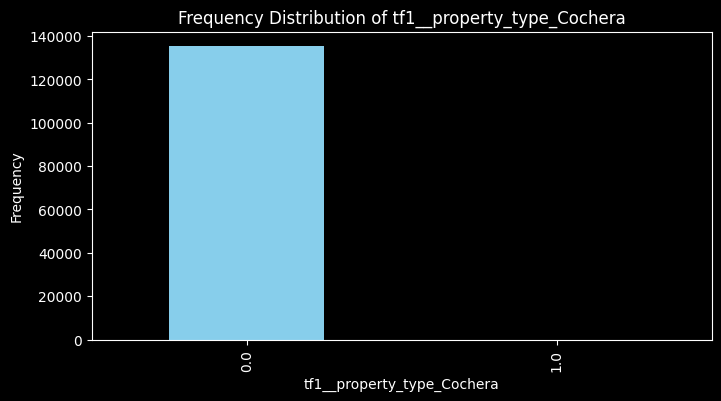

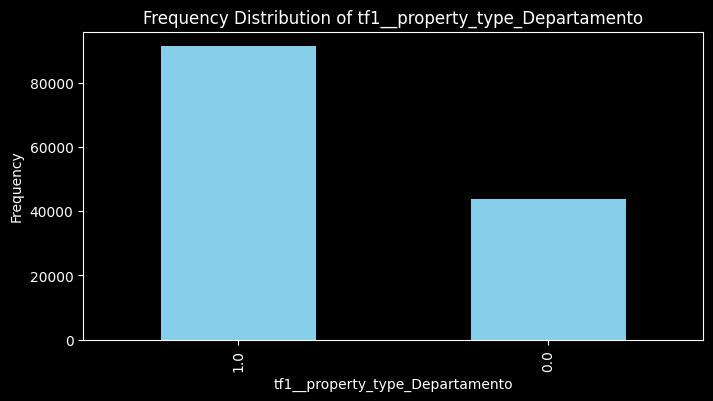

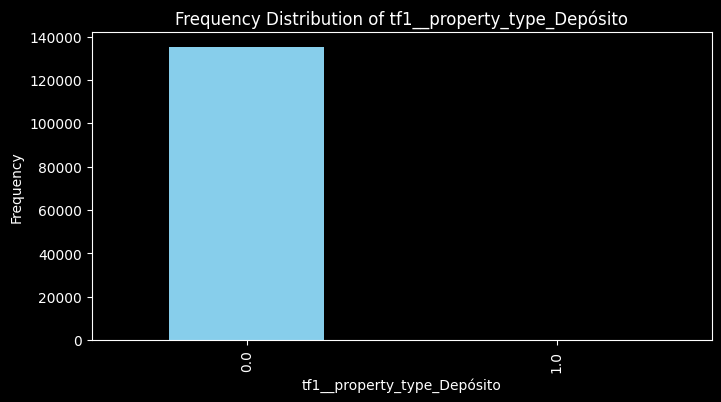

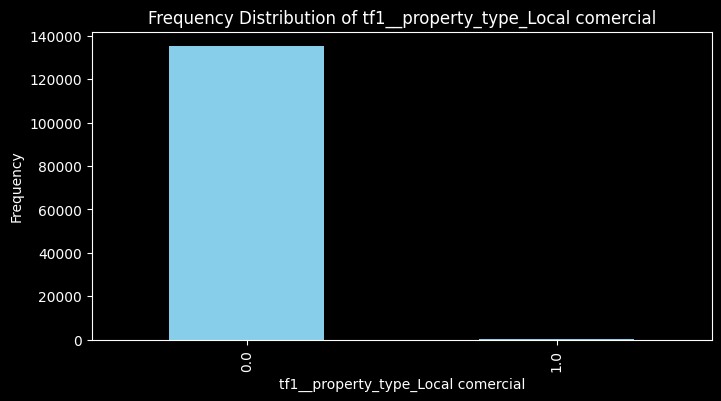

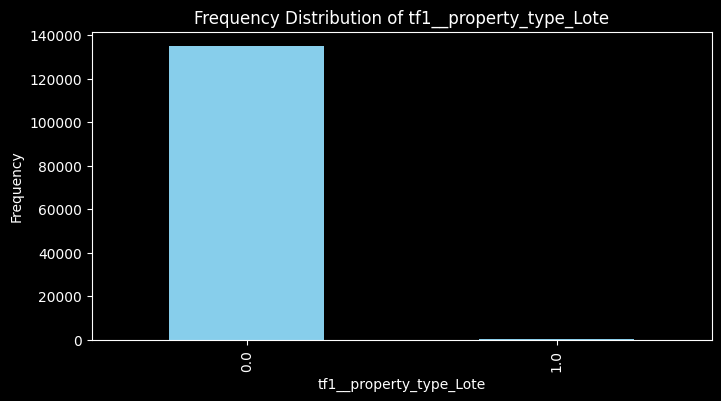

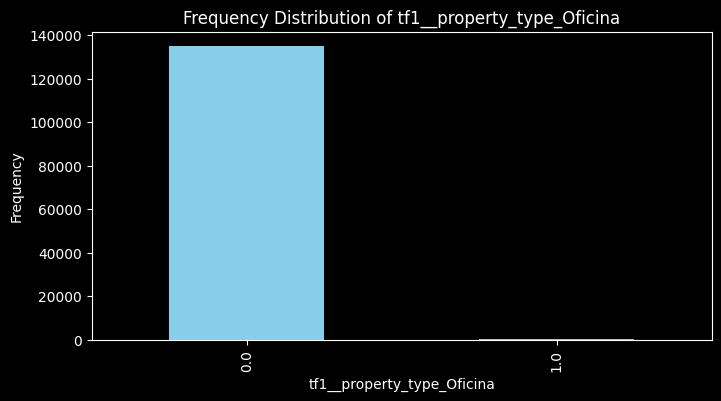

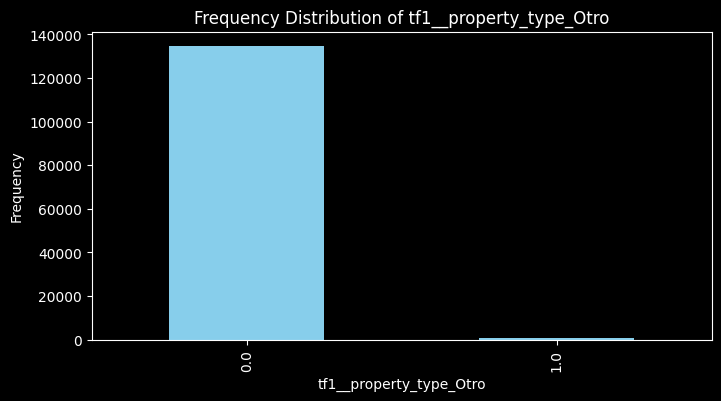

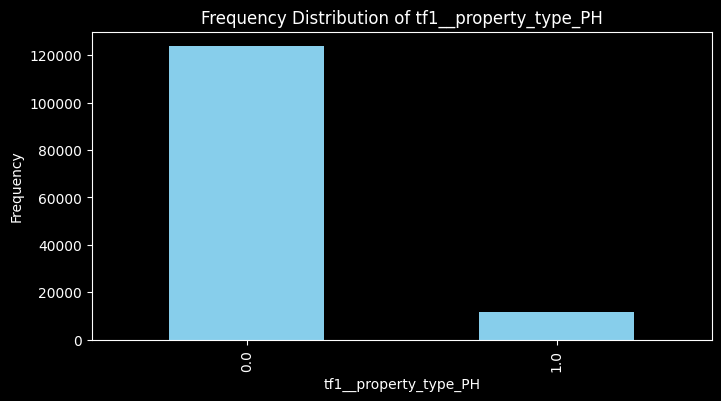

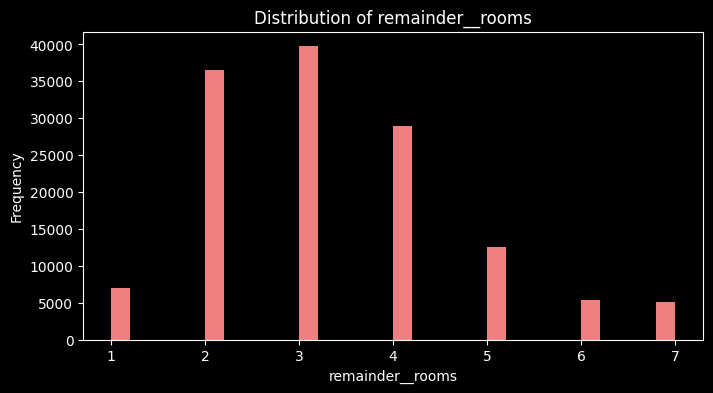

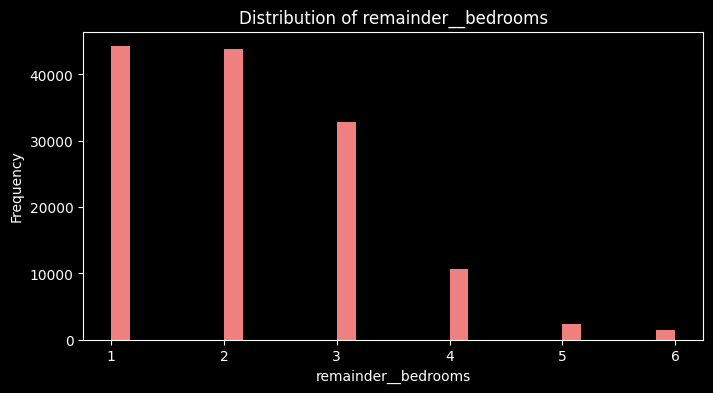

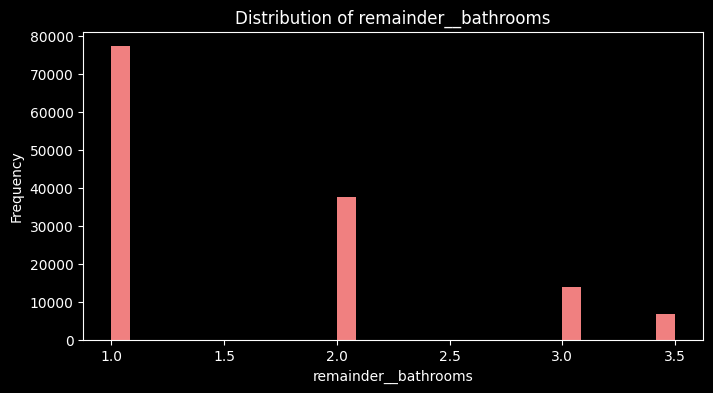

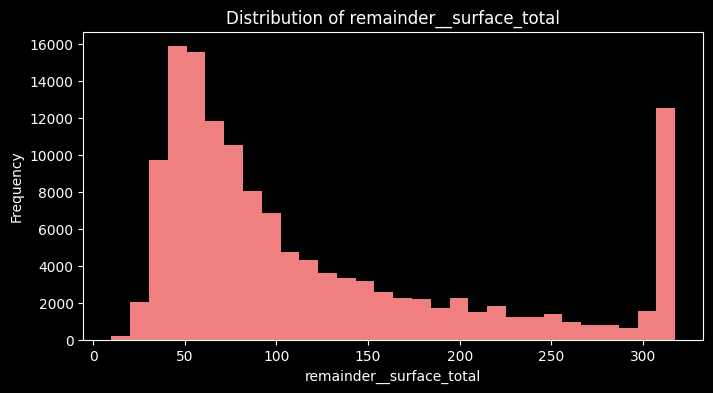

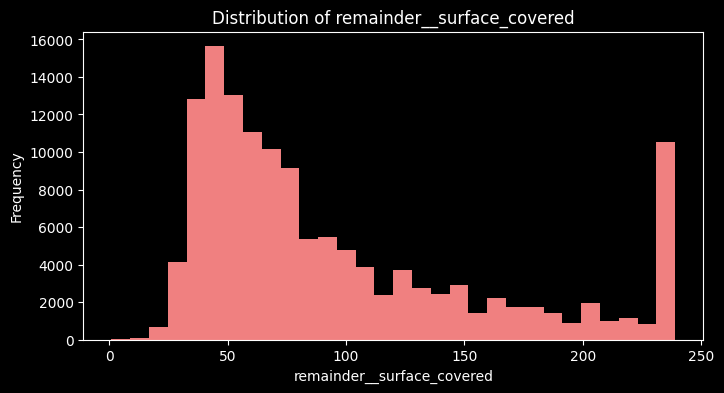

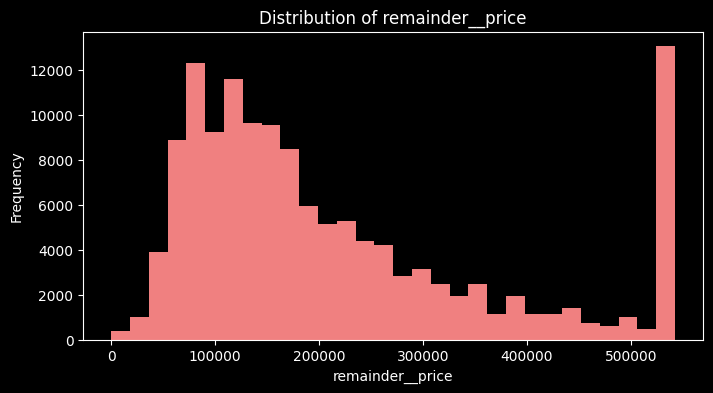

In [ ]:
for col in df_outlier.columns:
    plt.figure(figsize=(8,4))
    if 'tf1__property_type' in col:
        df_outlier[col].value_counts().plot(kind='bar',color='skyblue')
        plt.title(f'Frequency Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
    else:
        df_outlier[col].plot(kind='hist',bins=30,color='lightcoral')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
    plt.show()

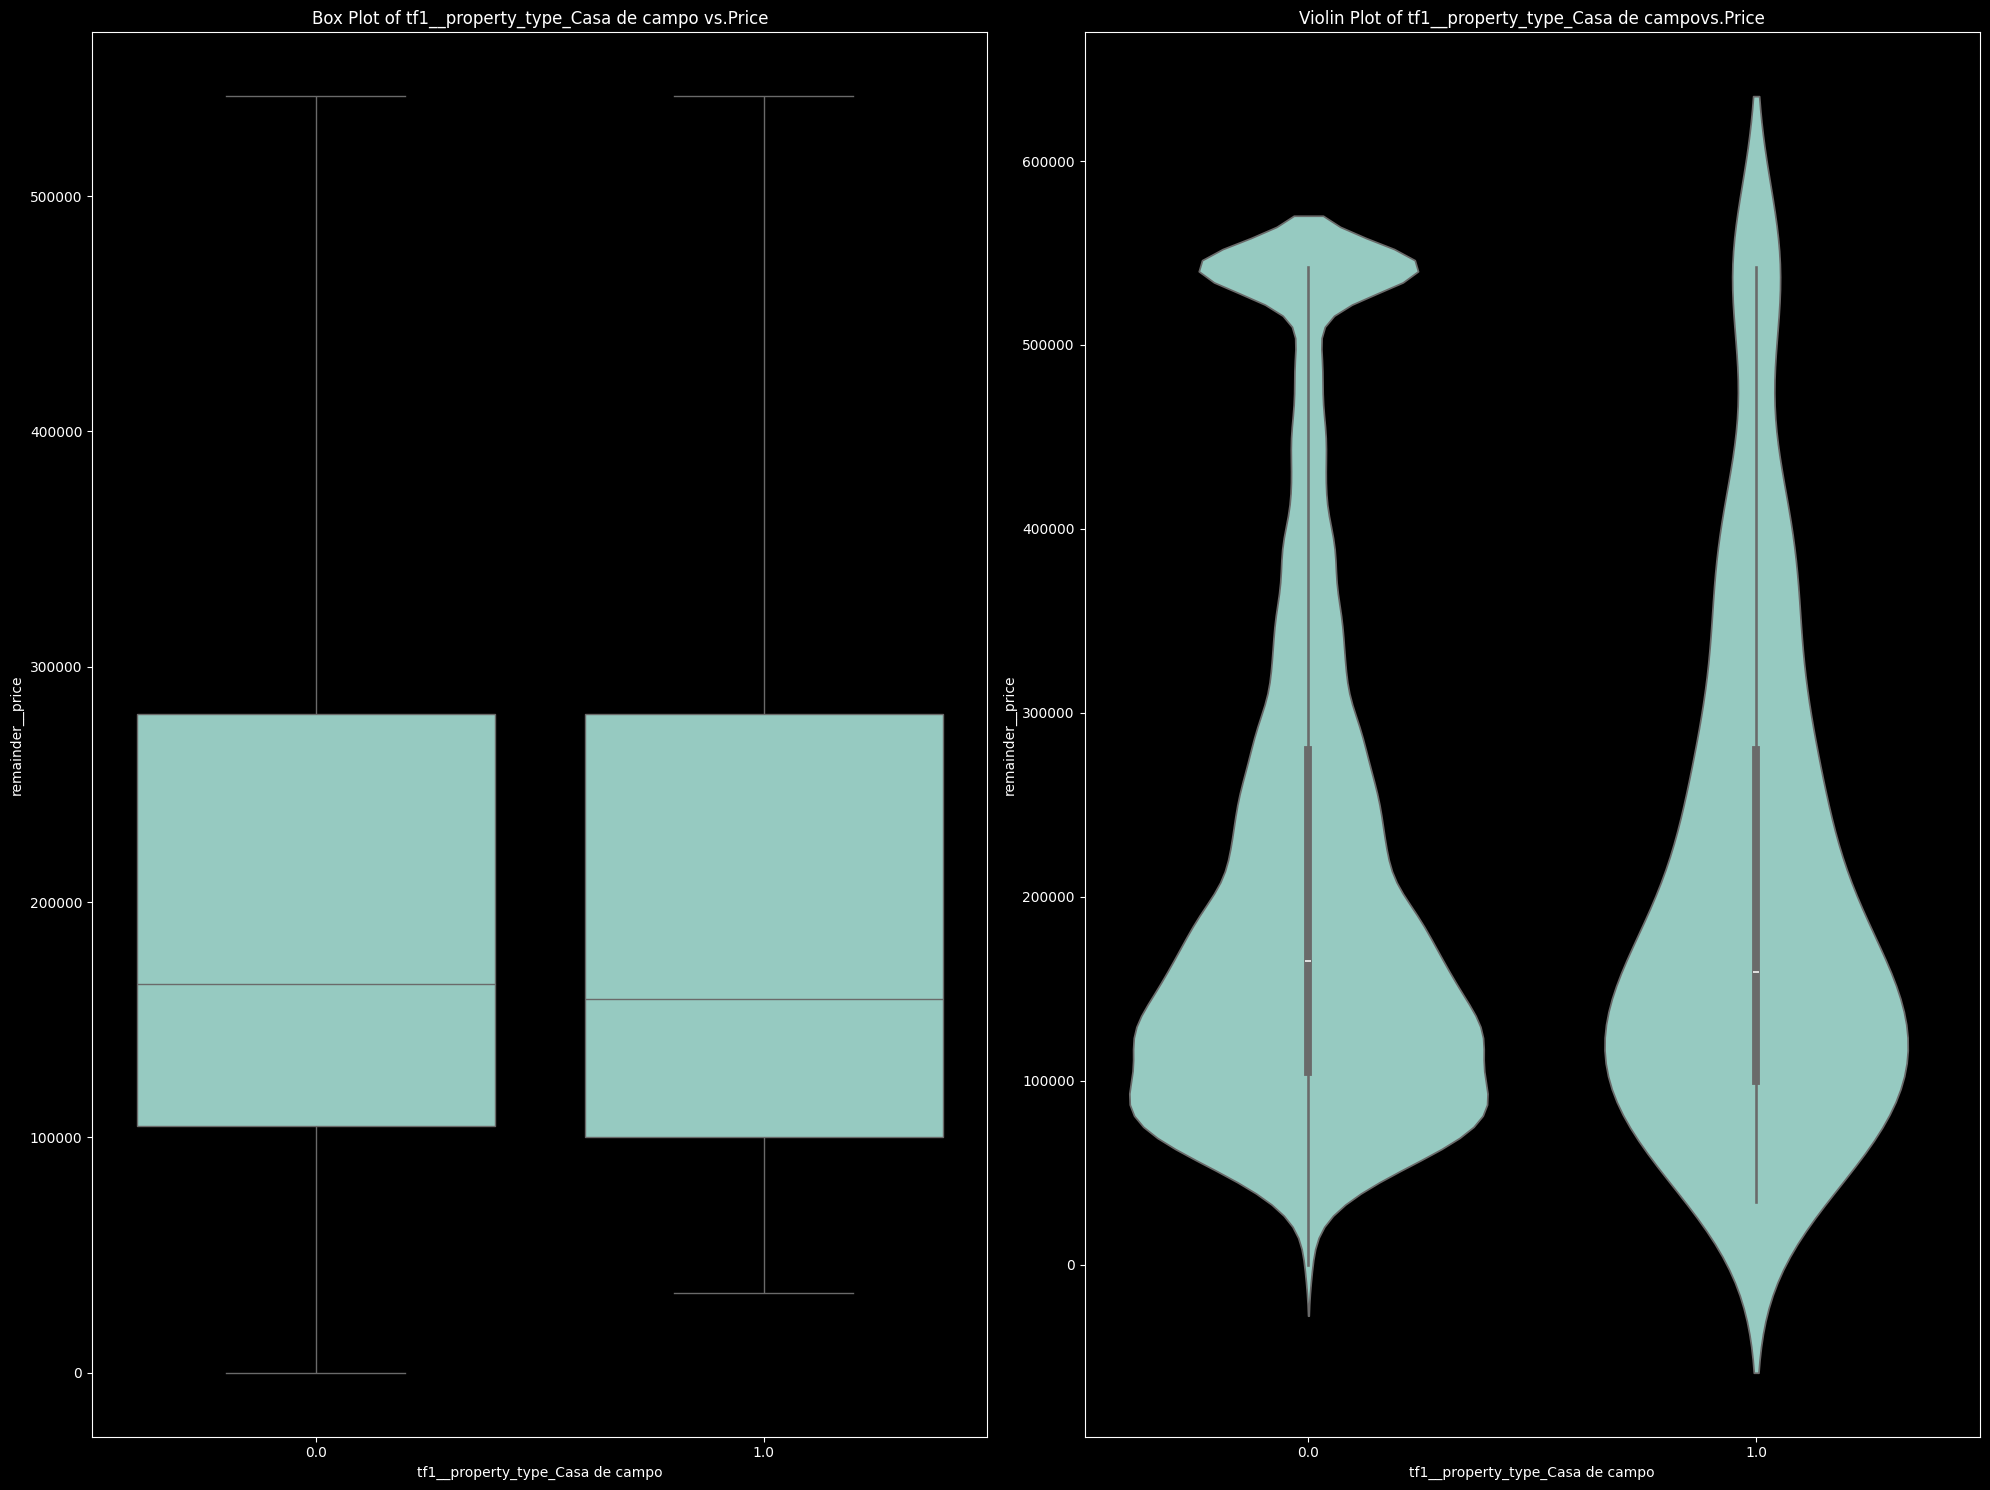

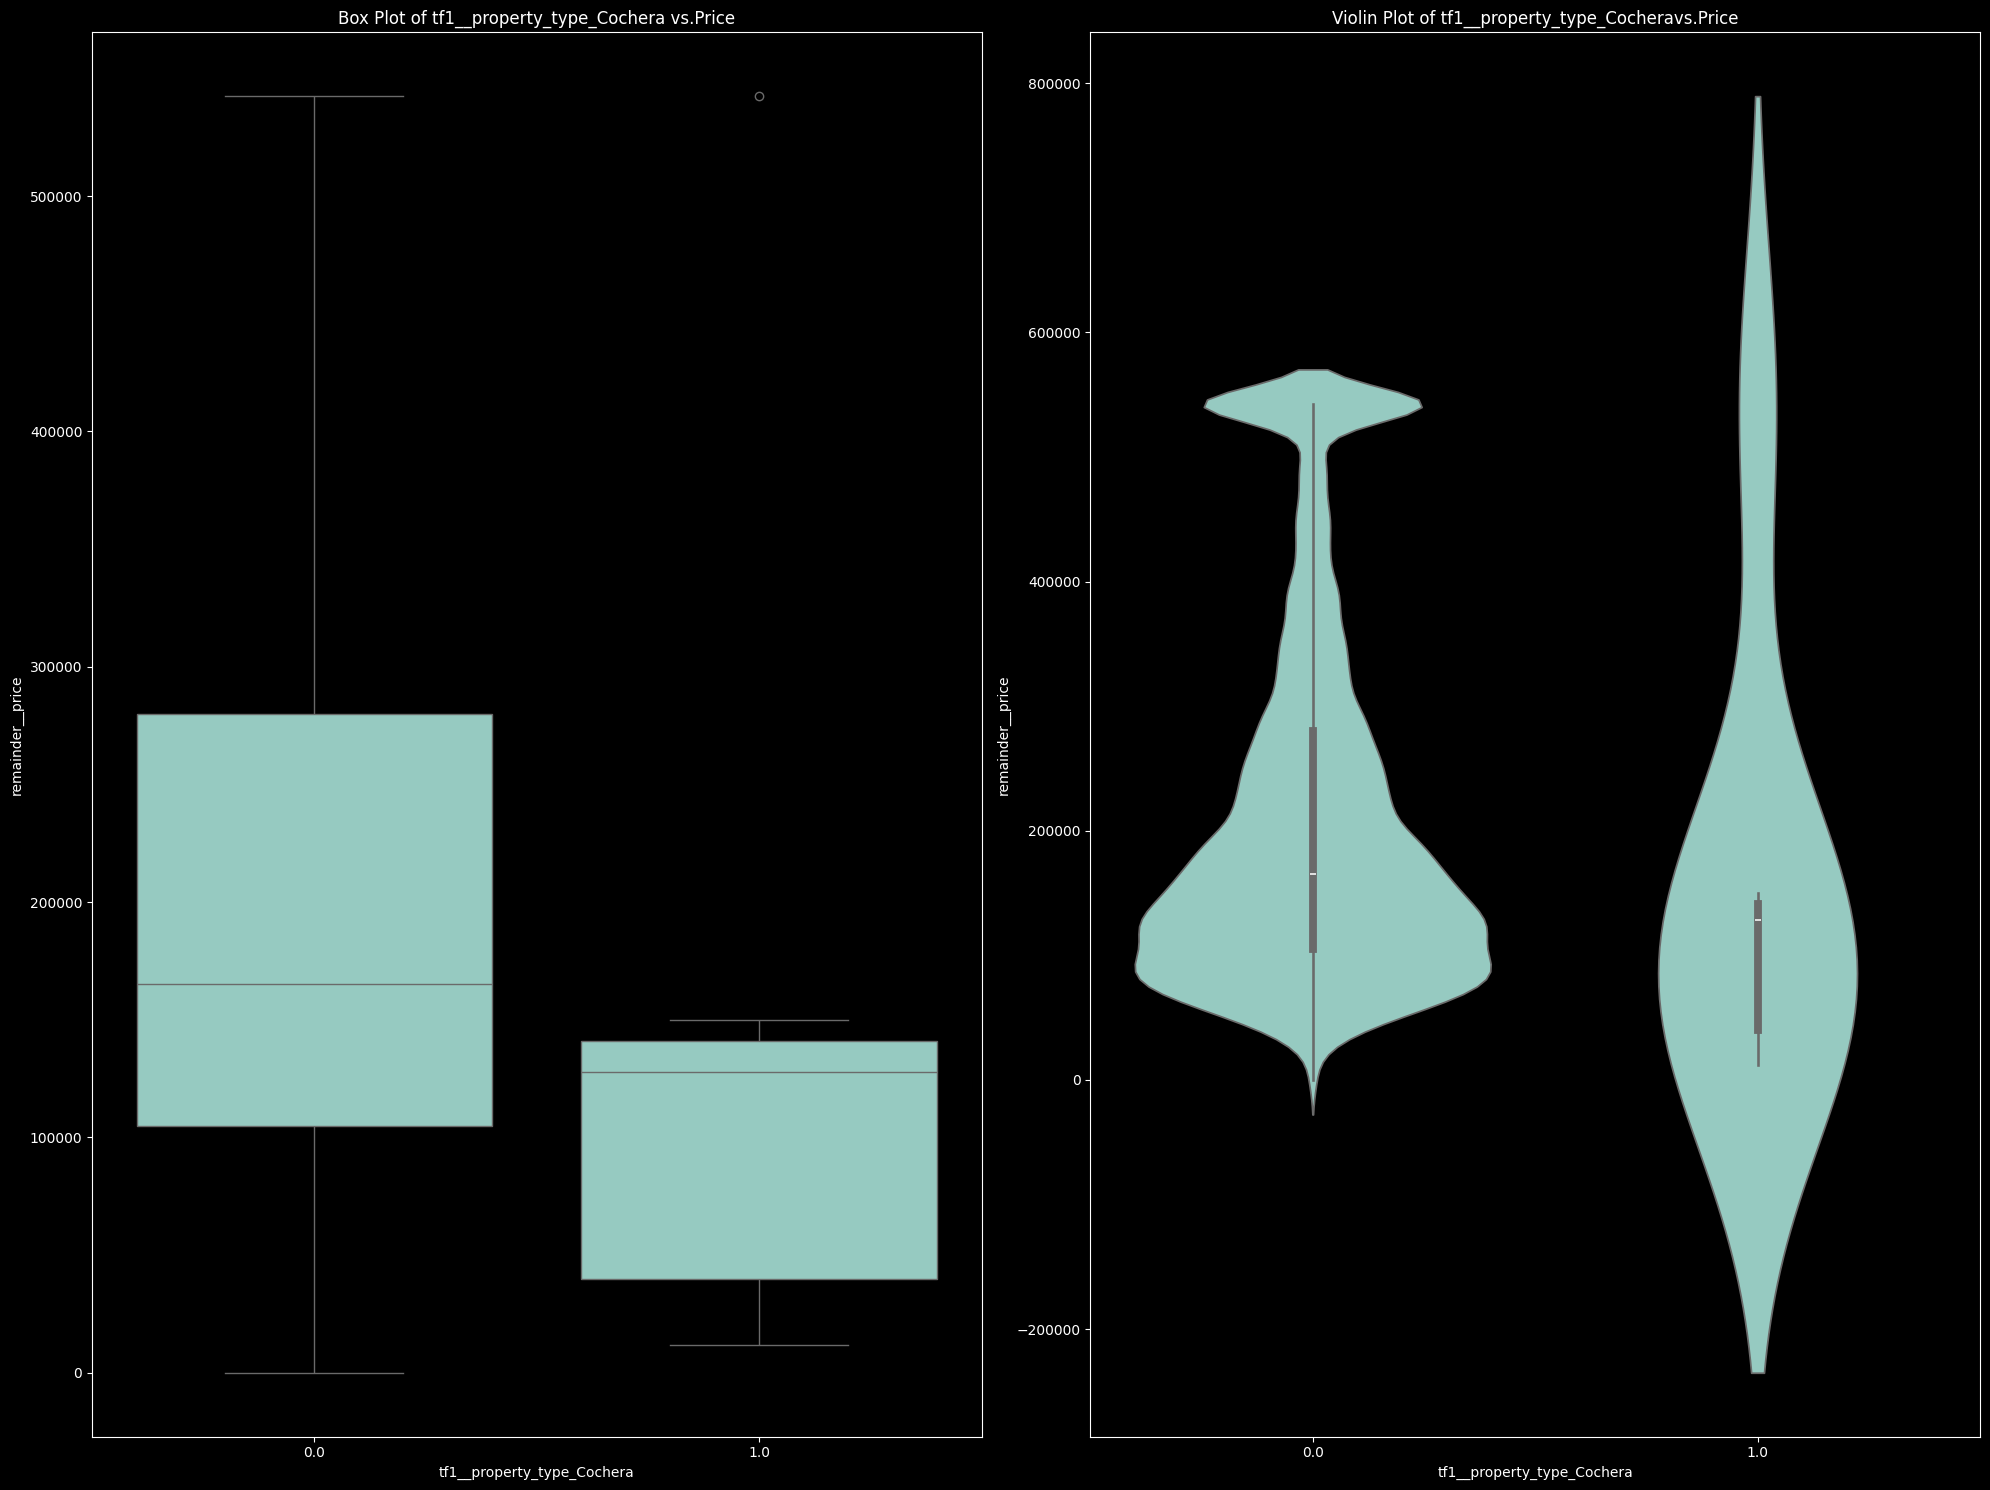

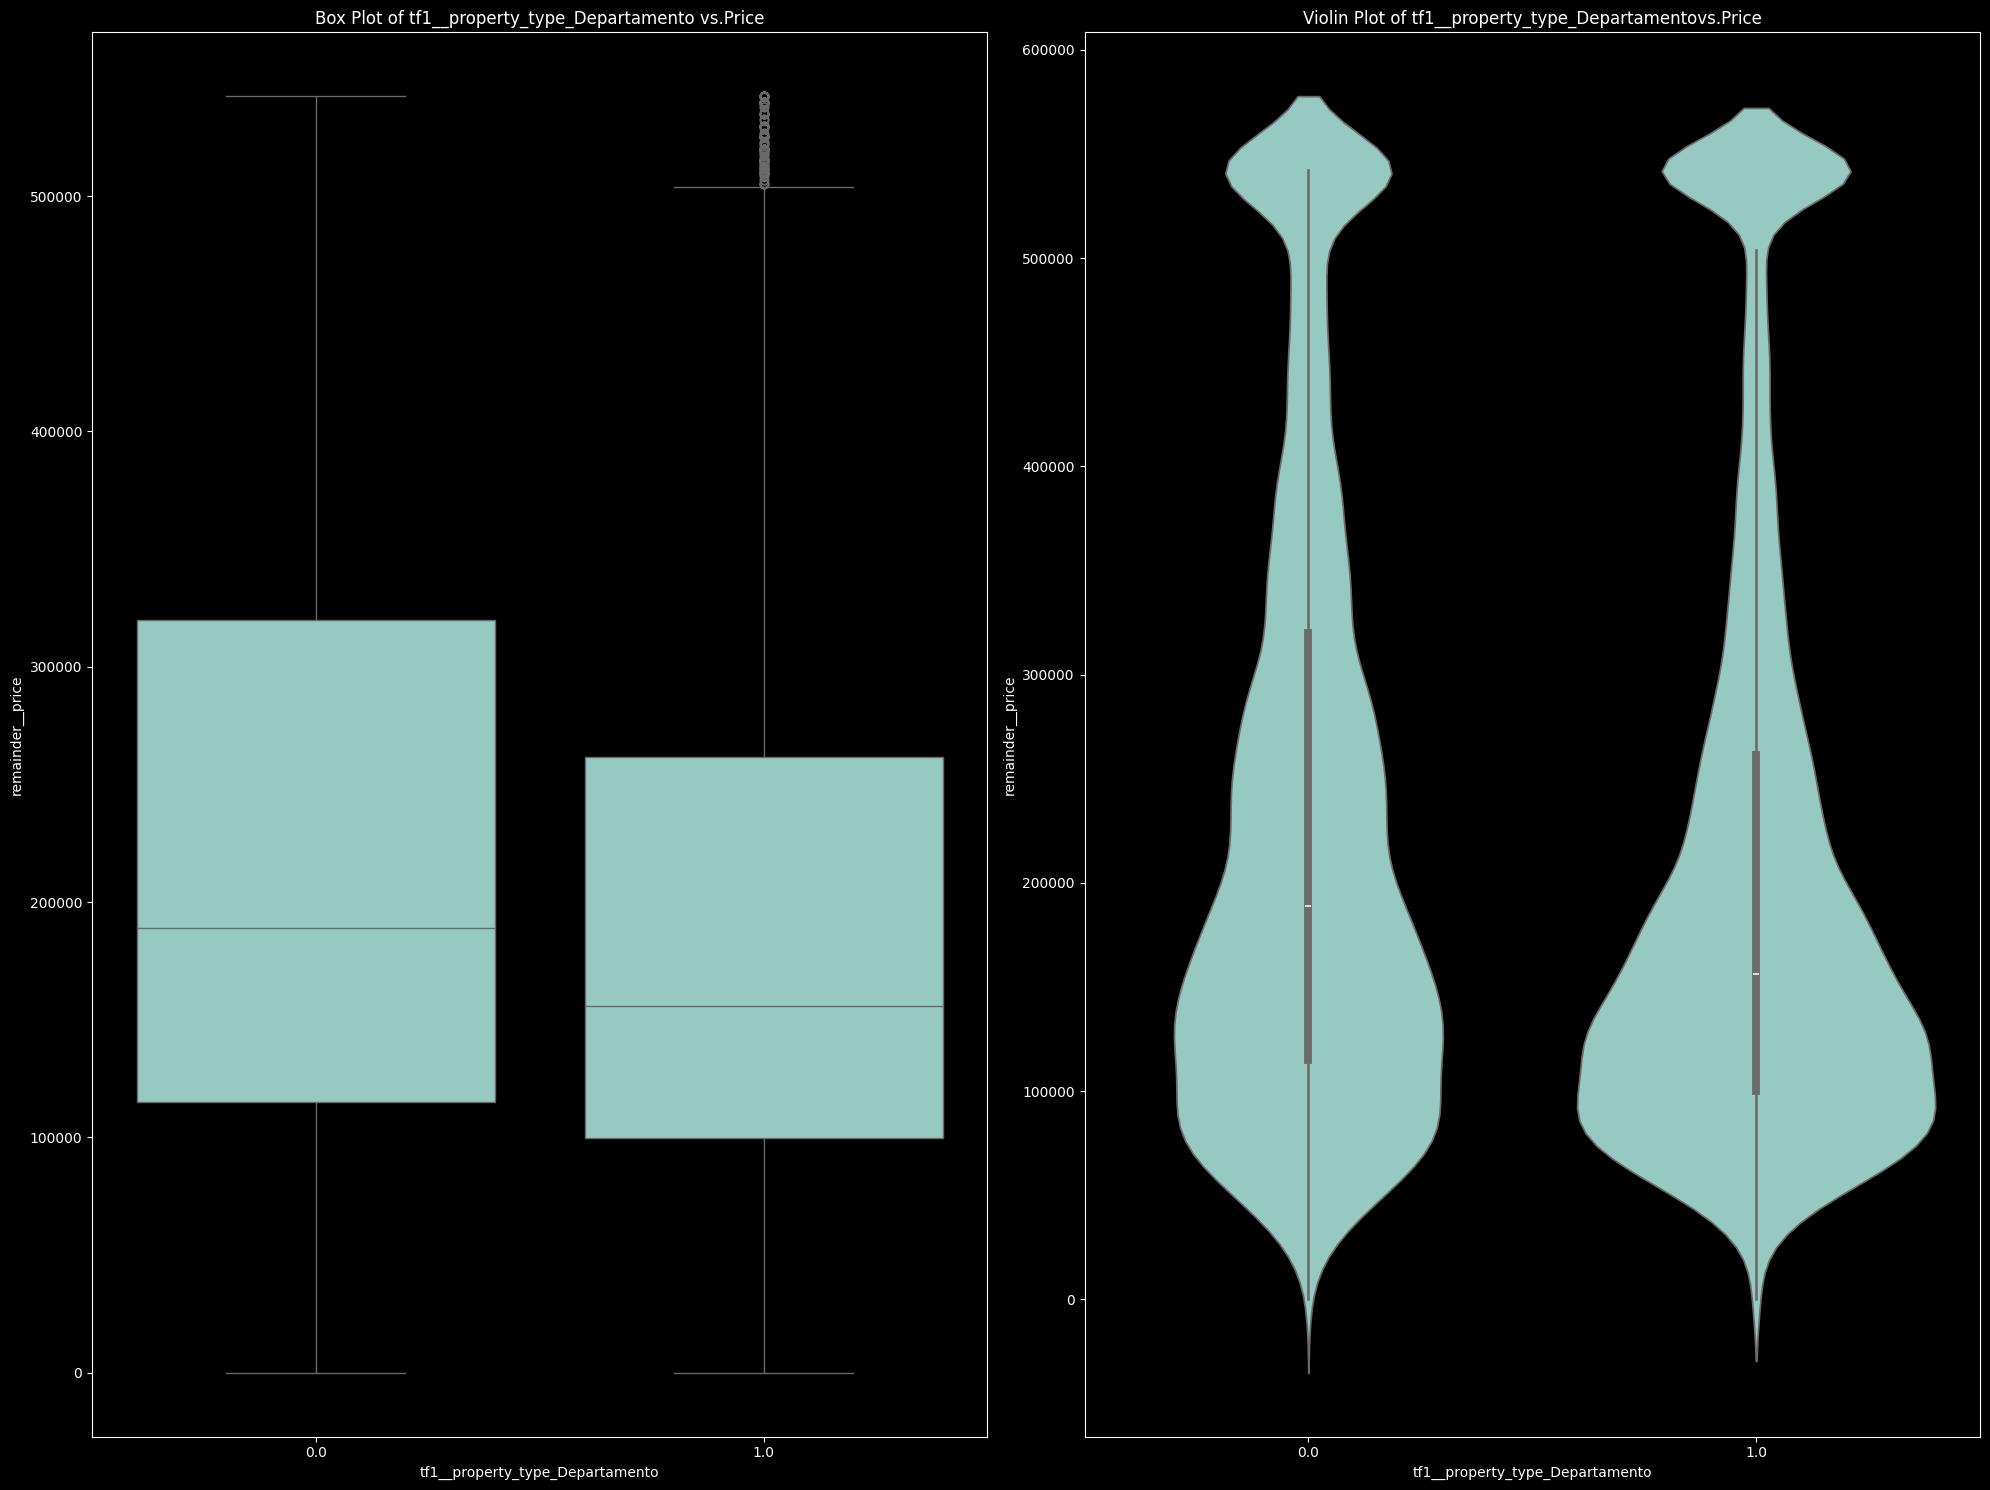

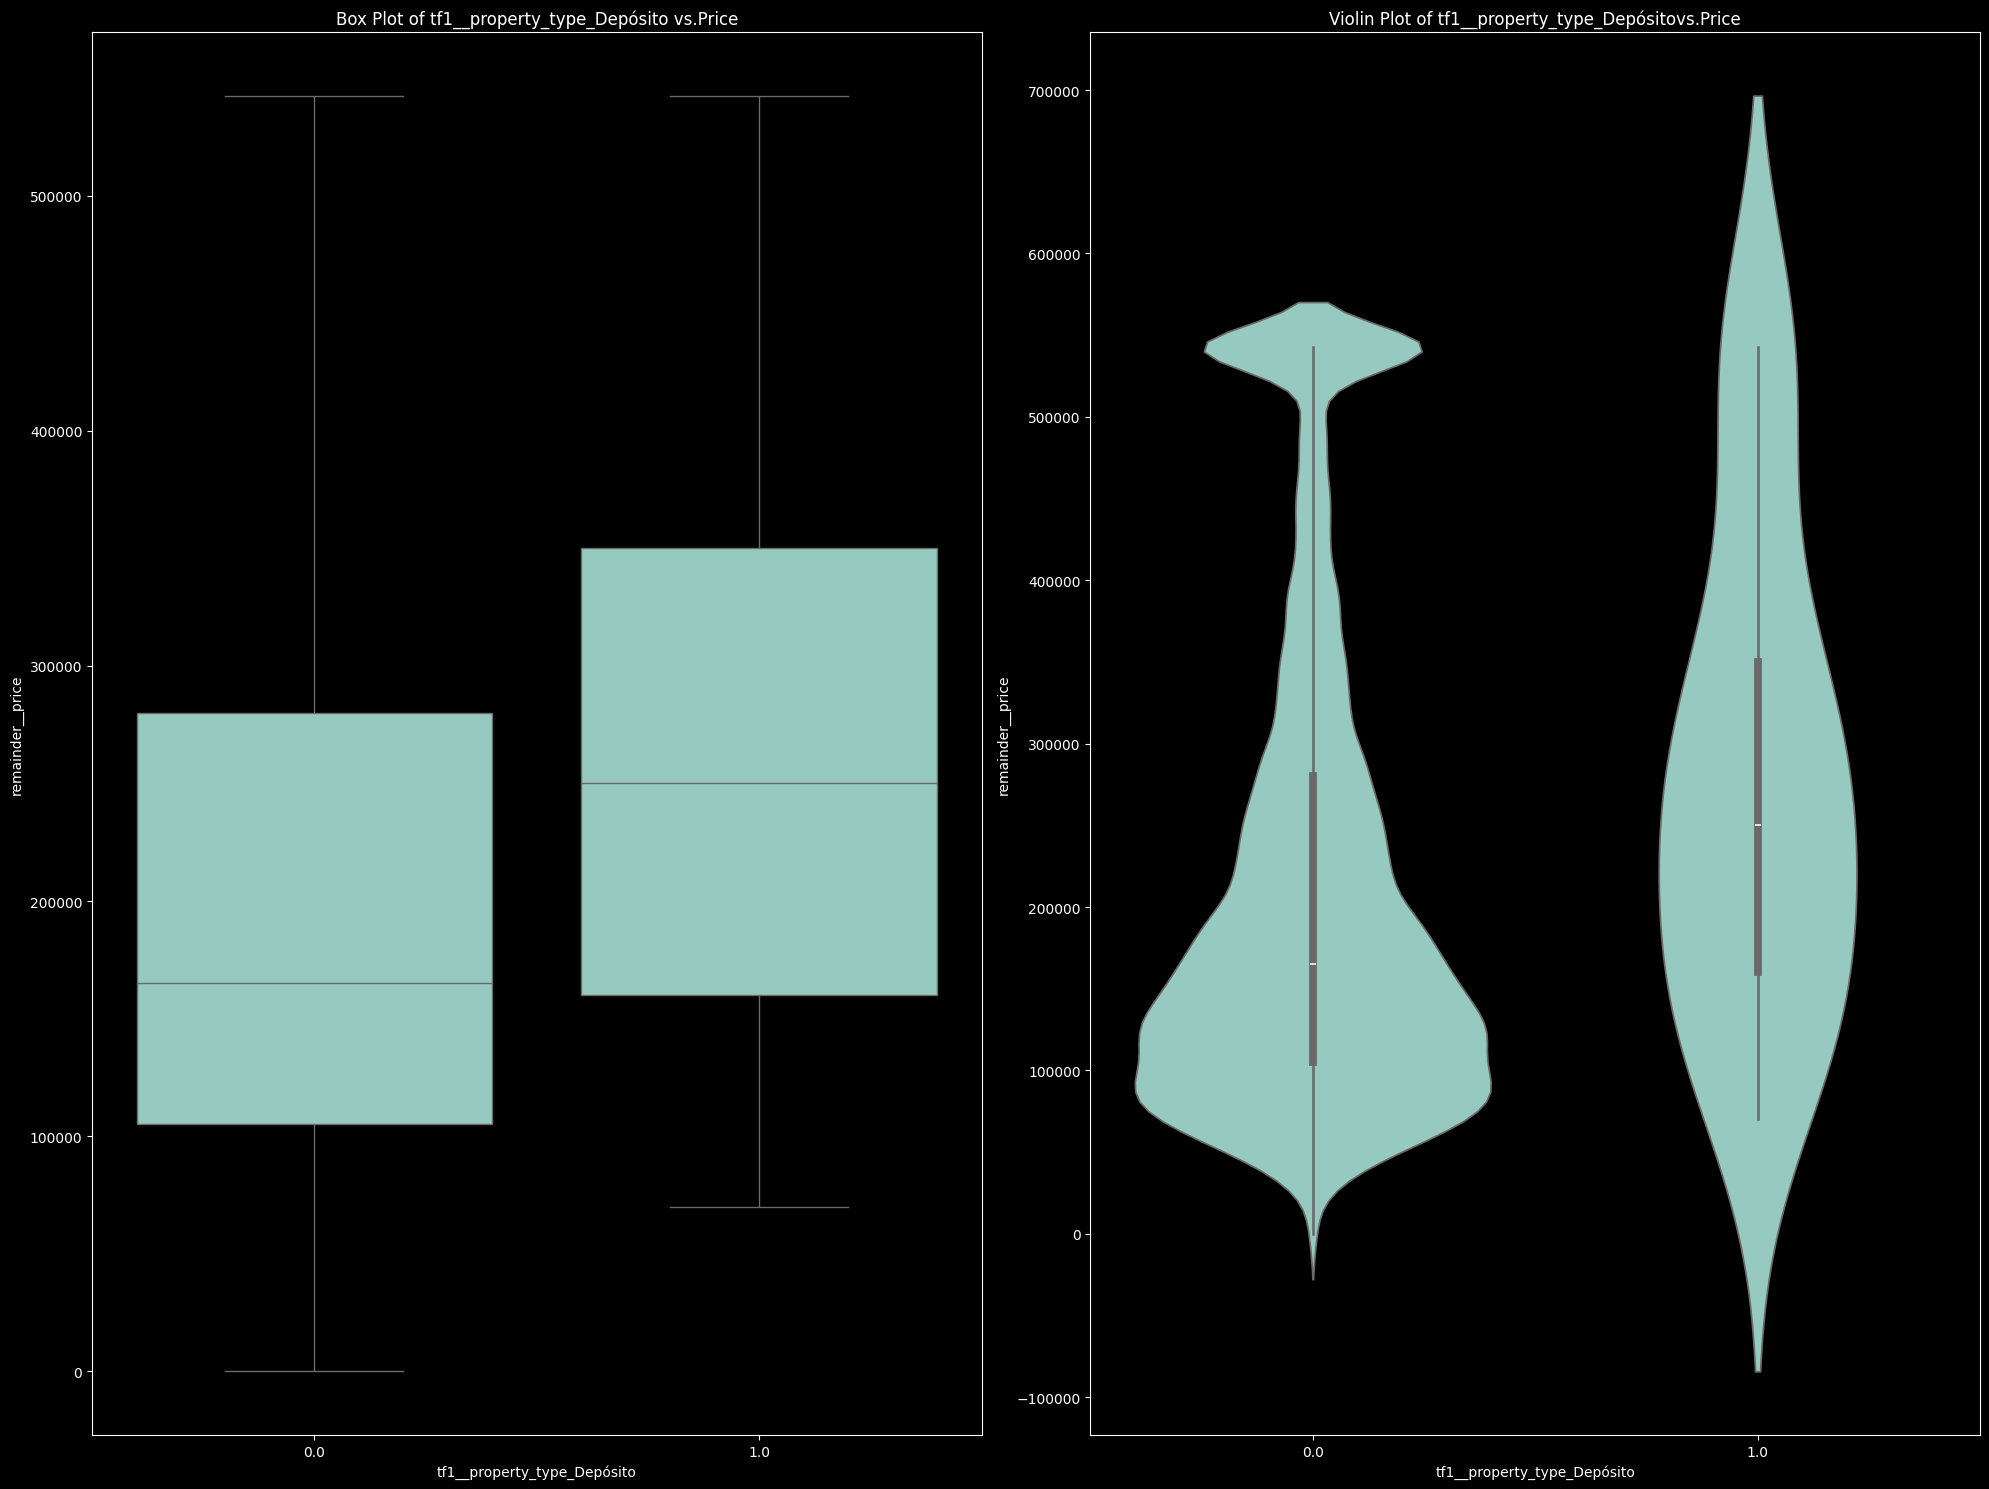

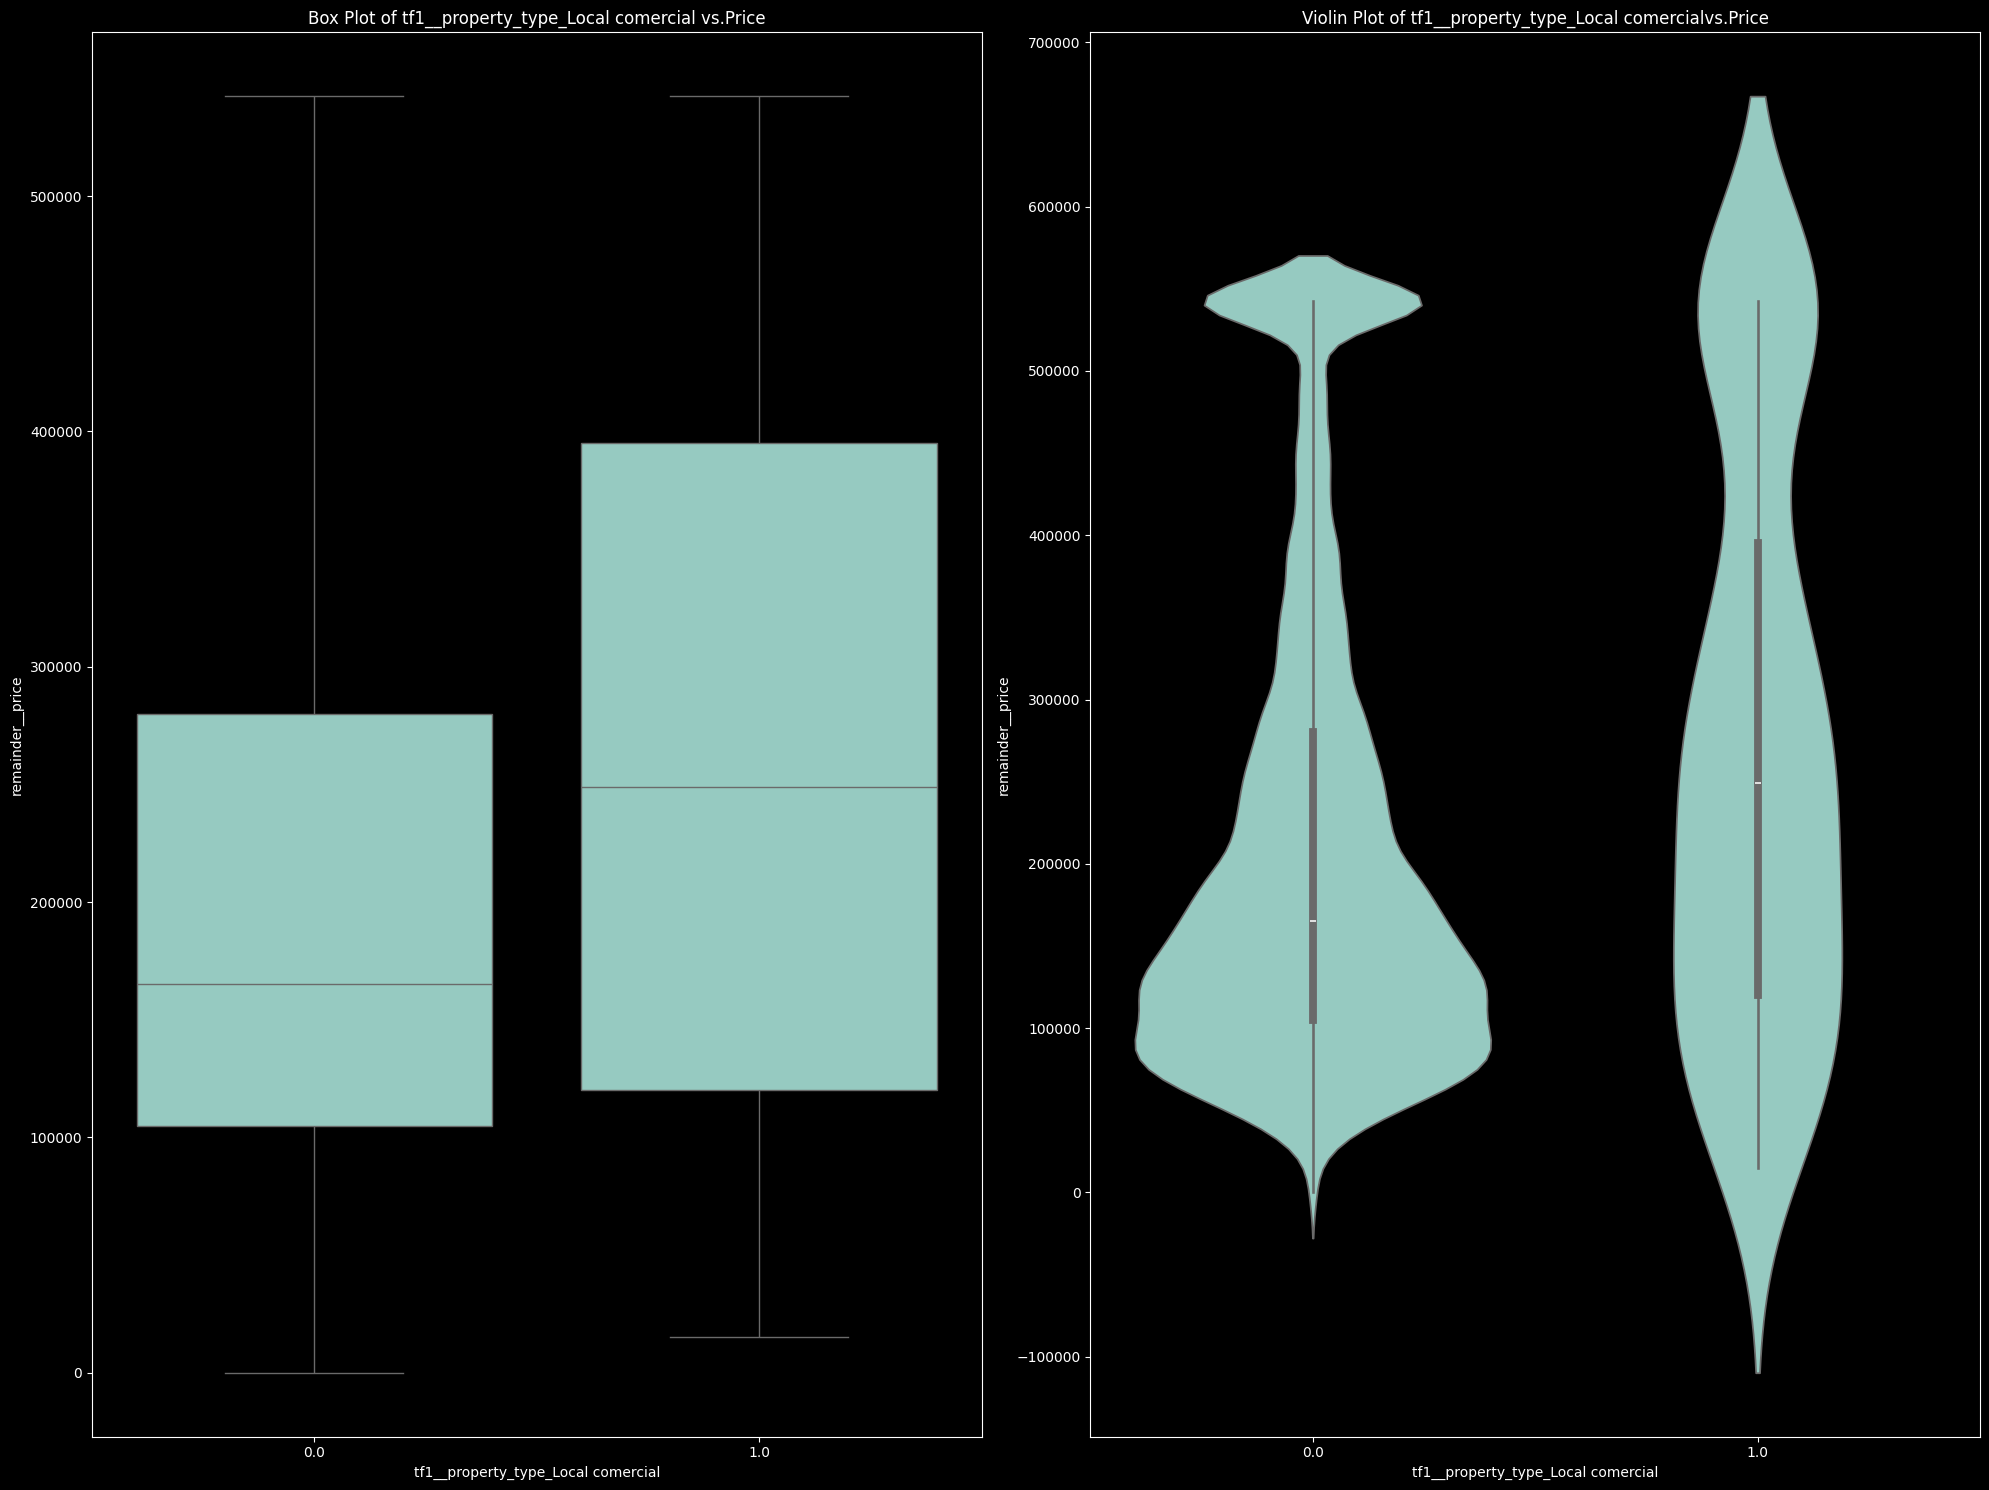

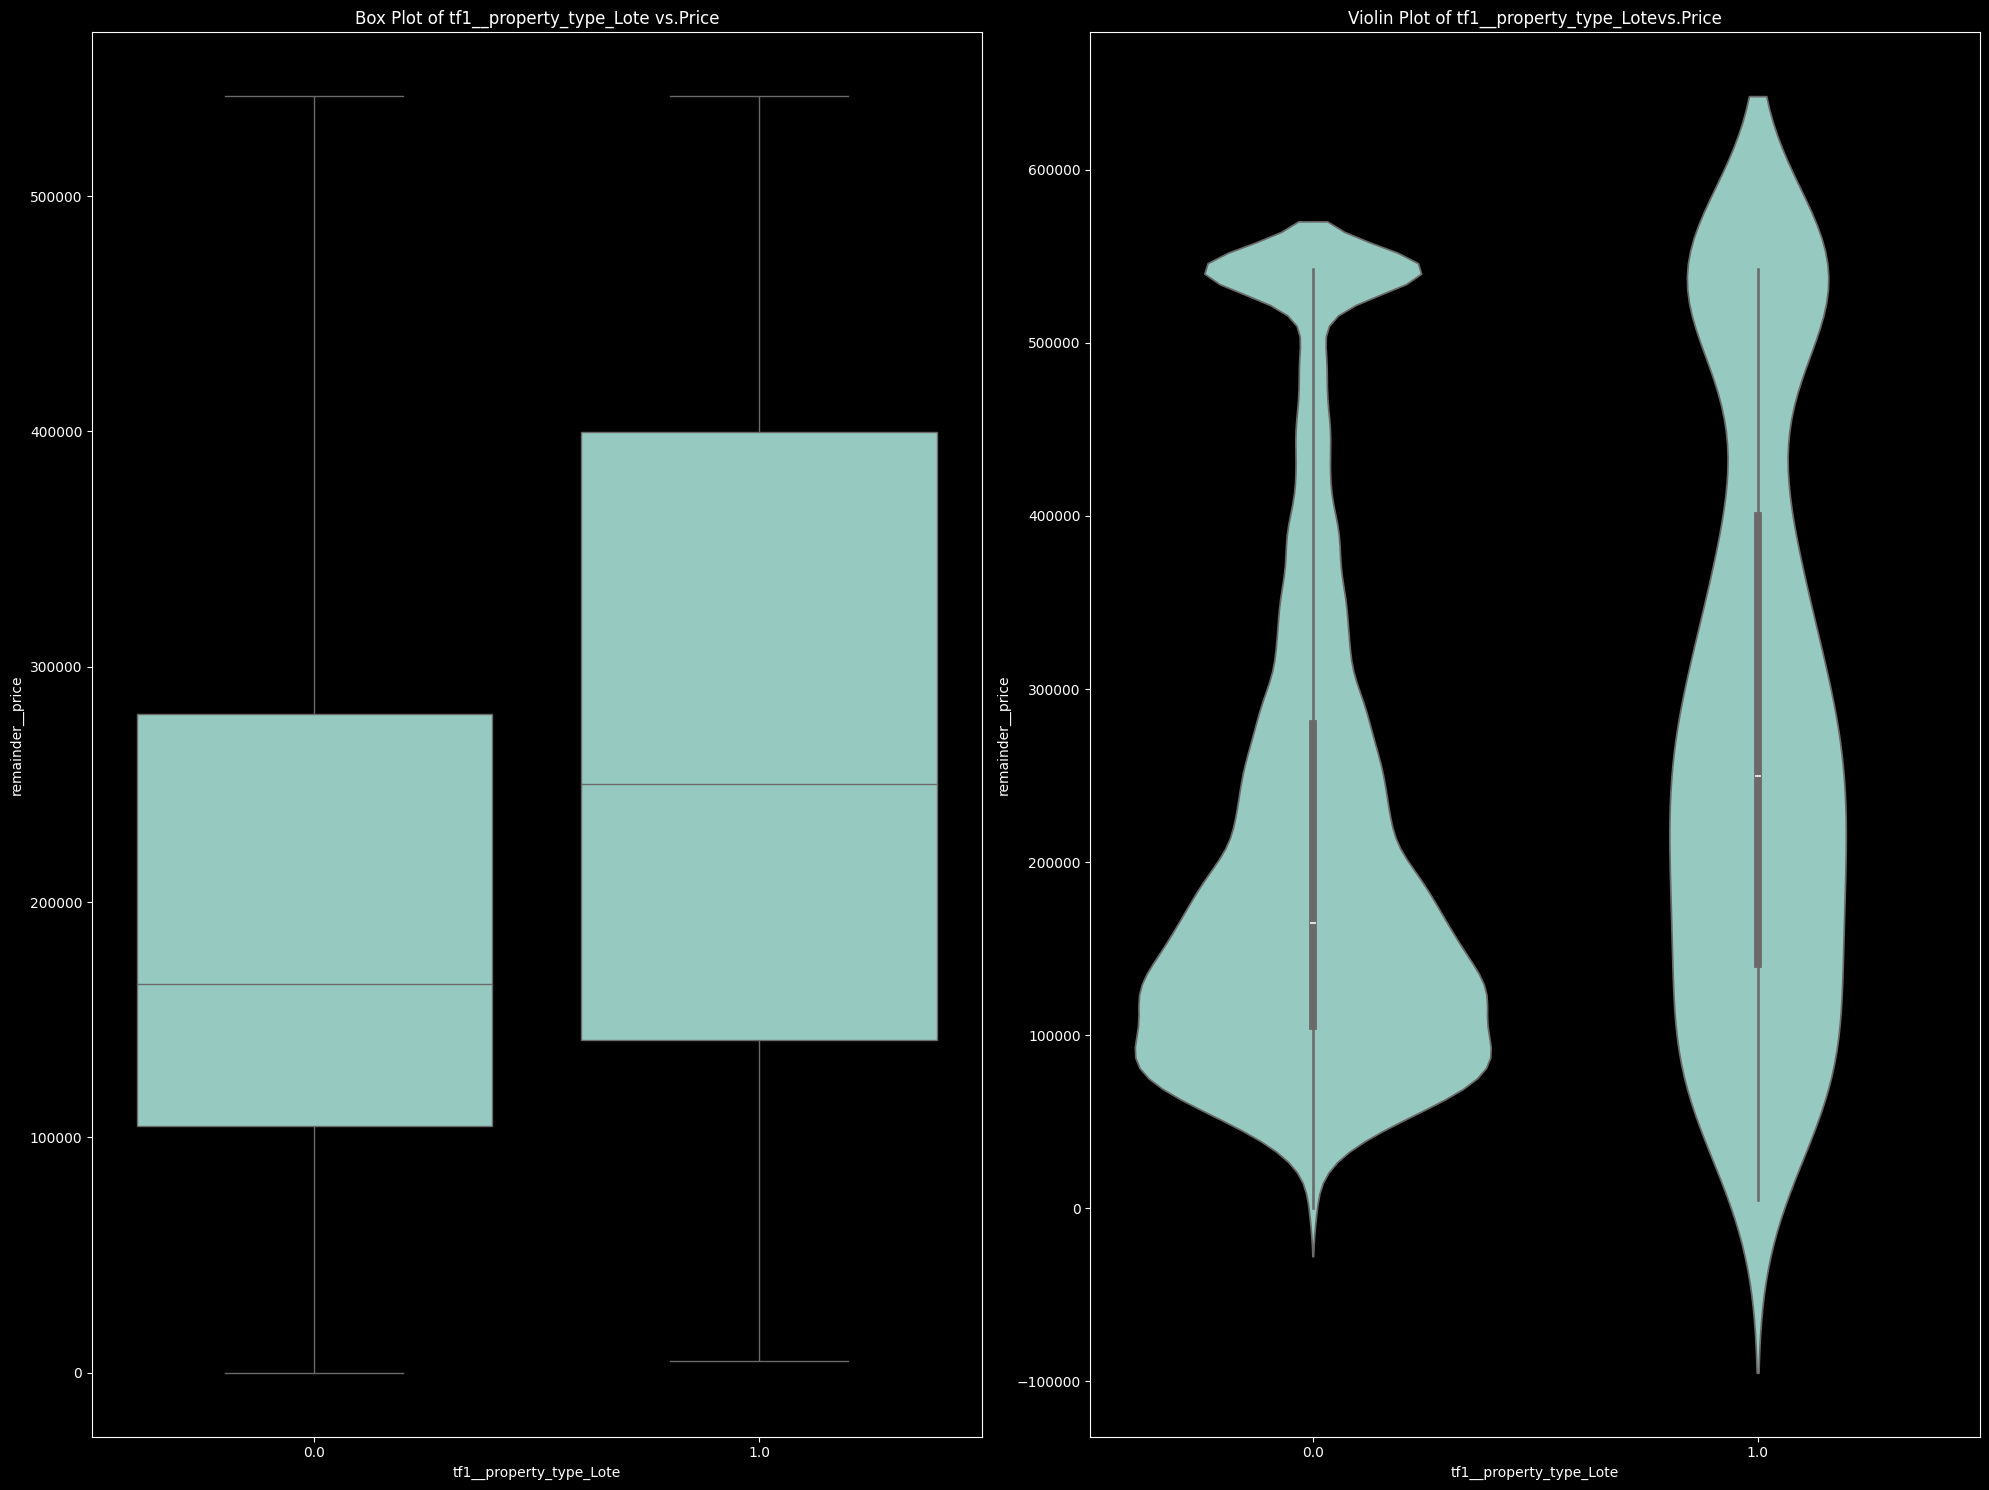

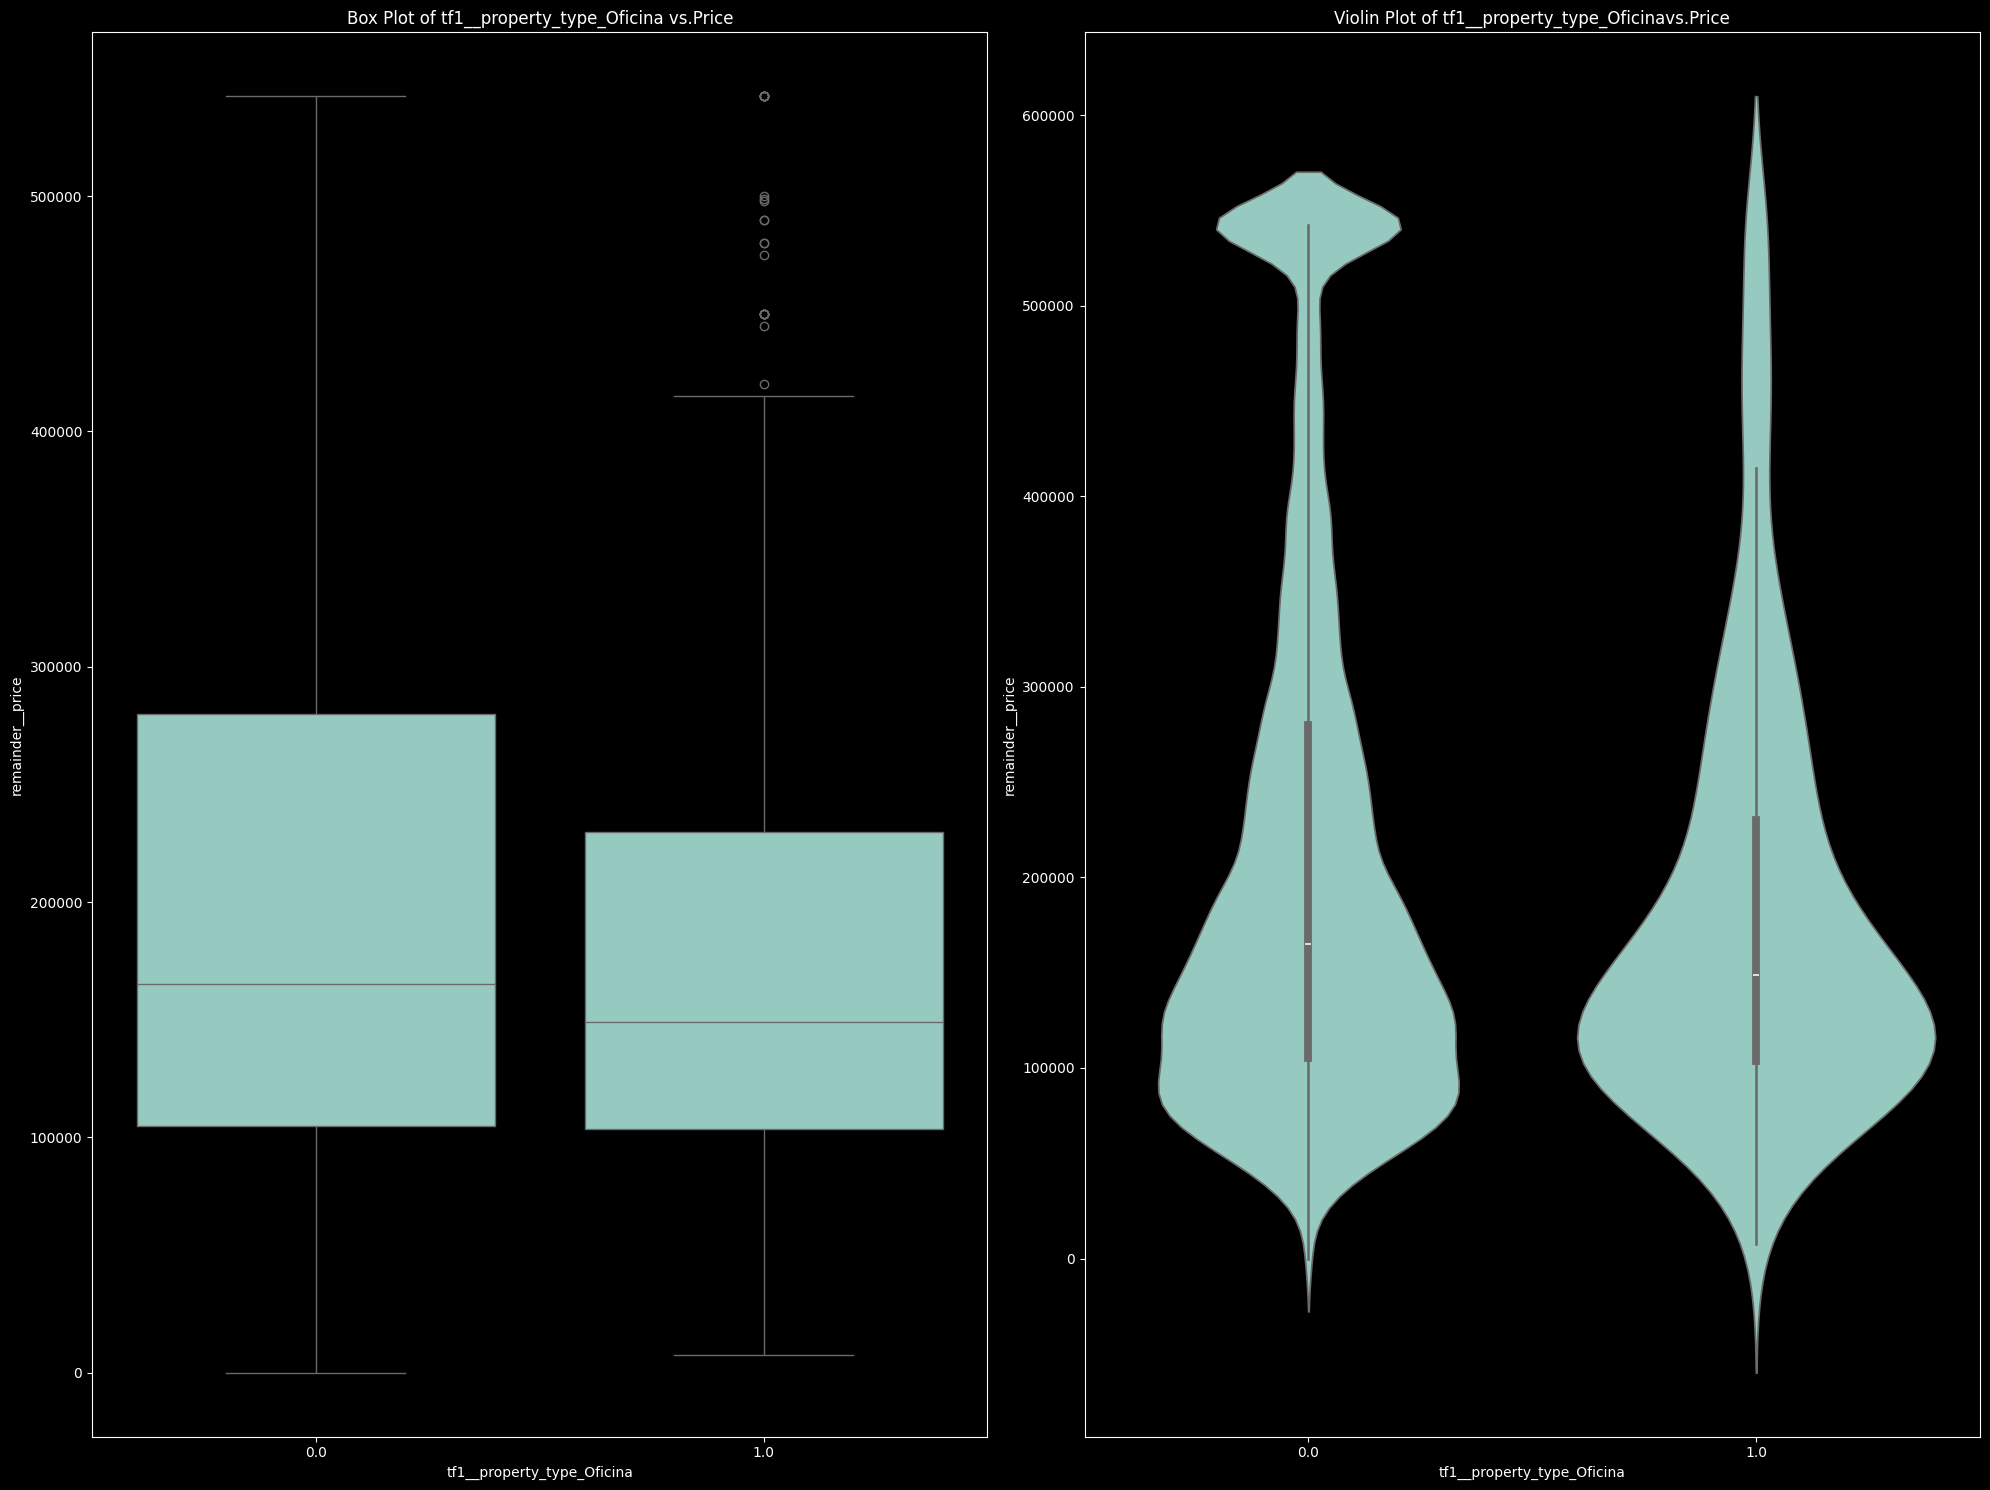

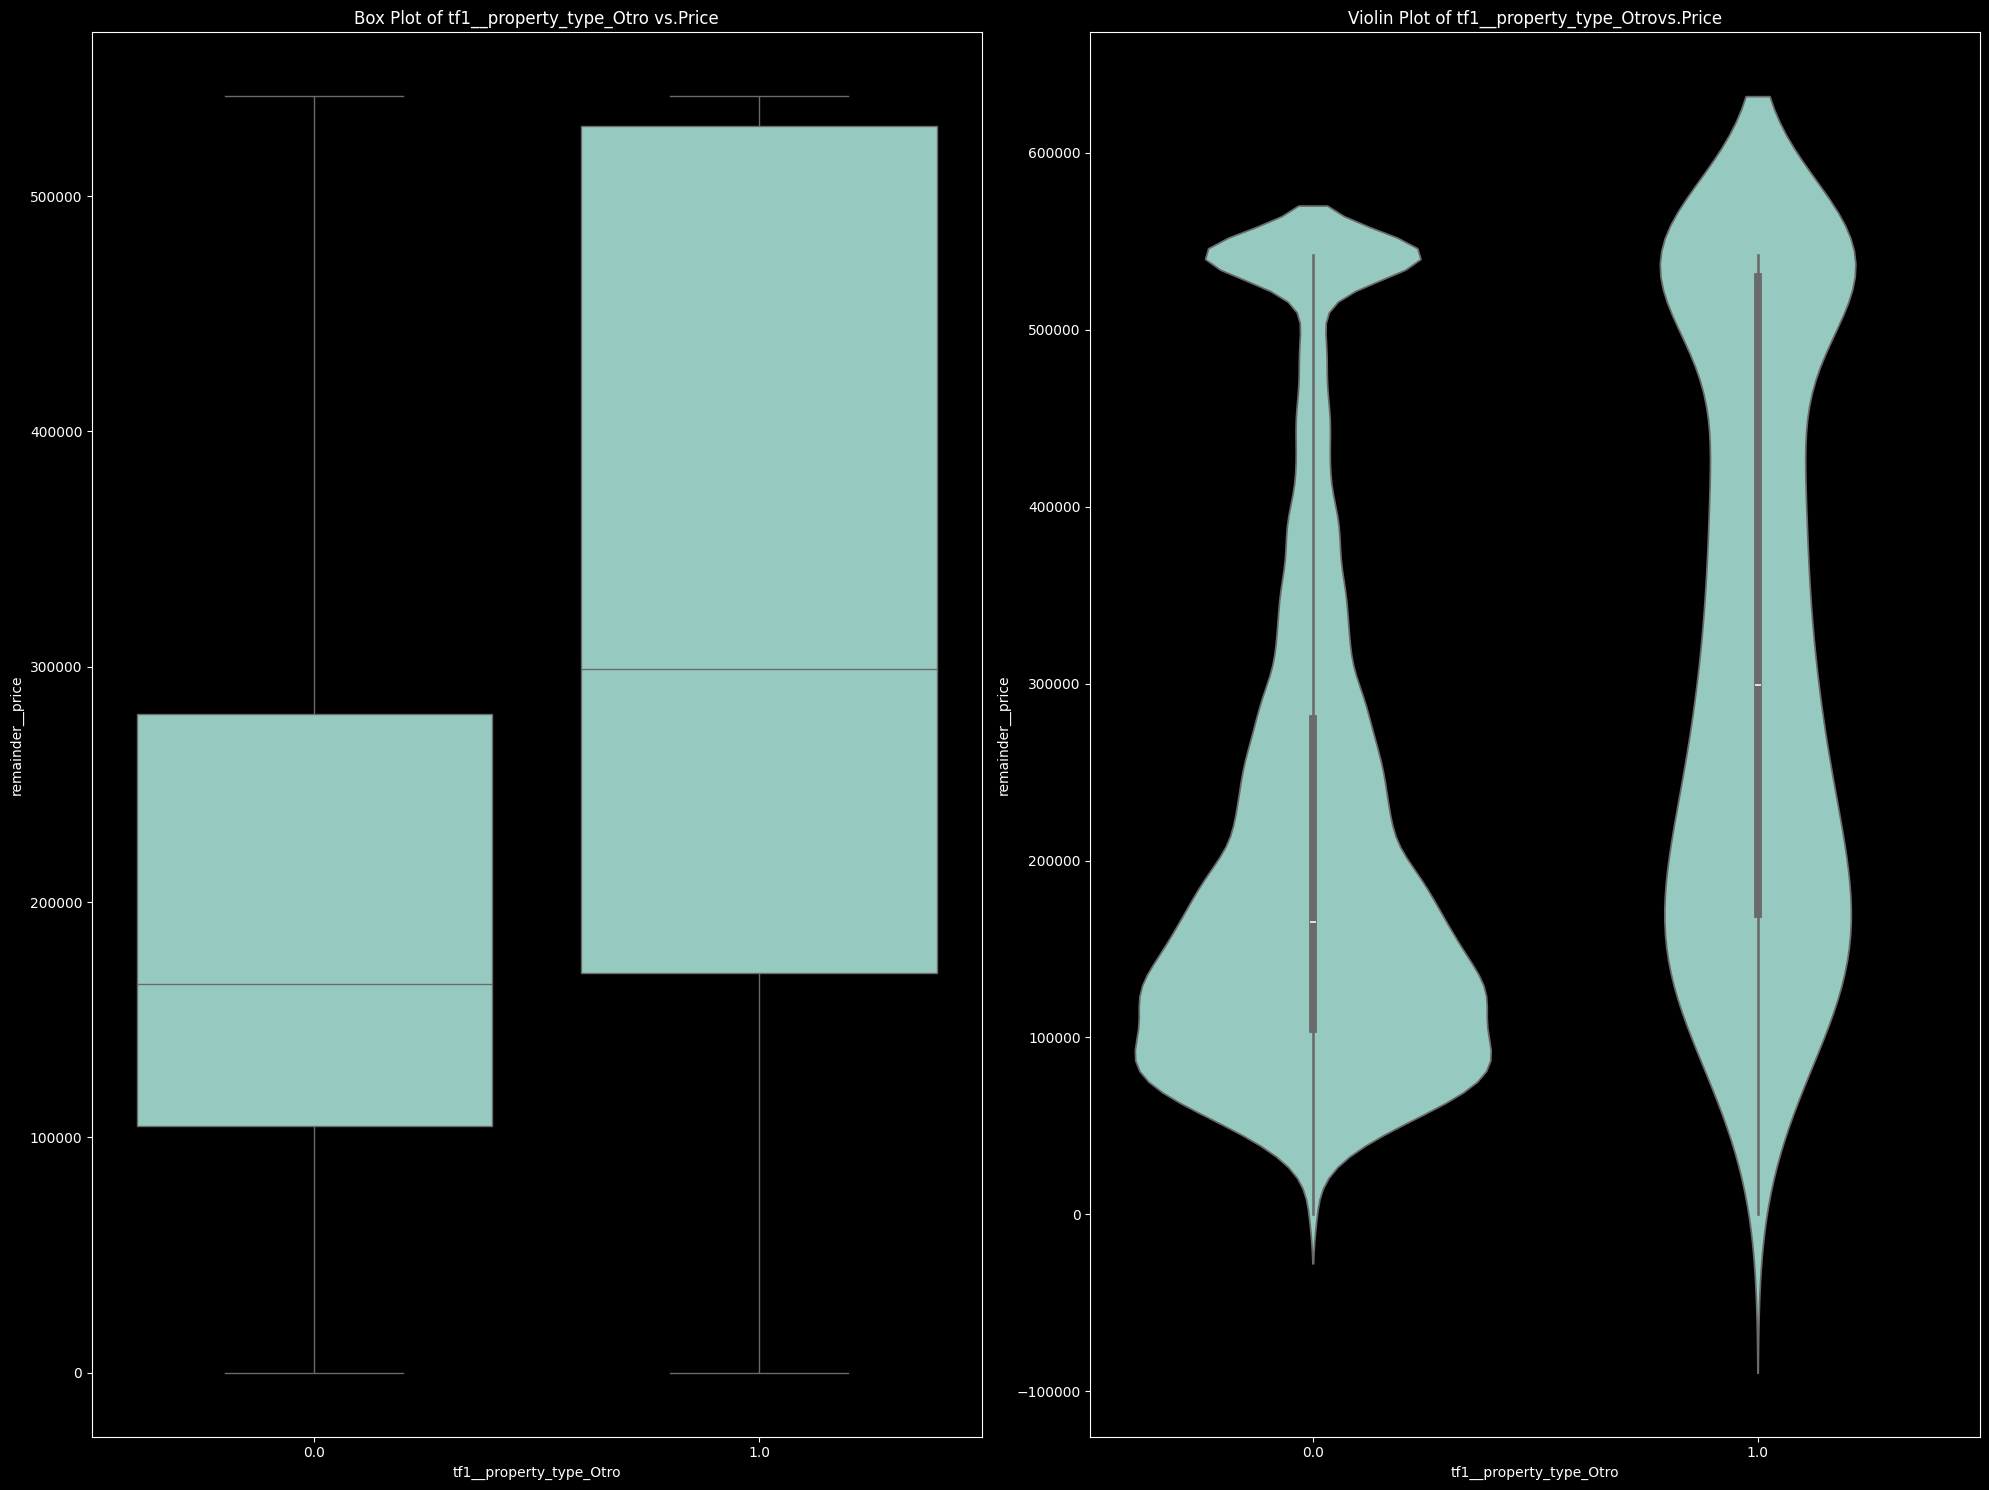

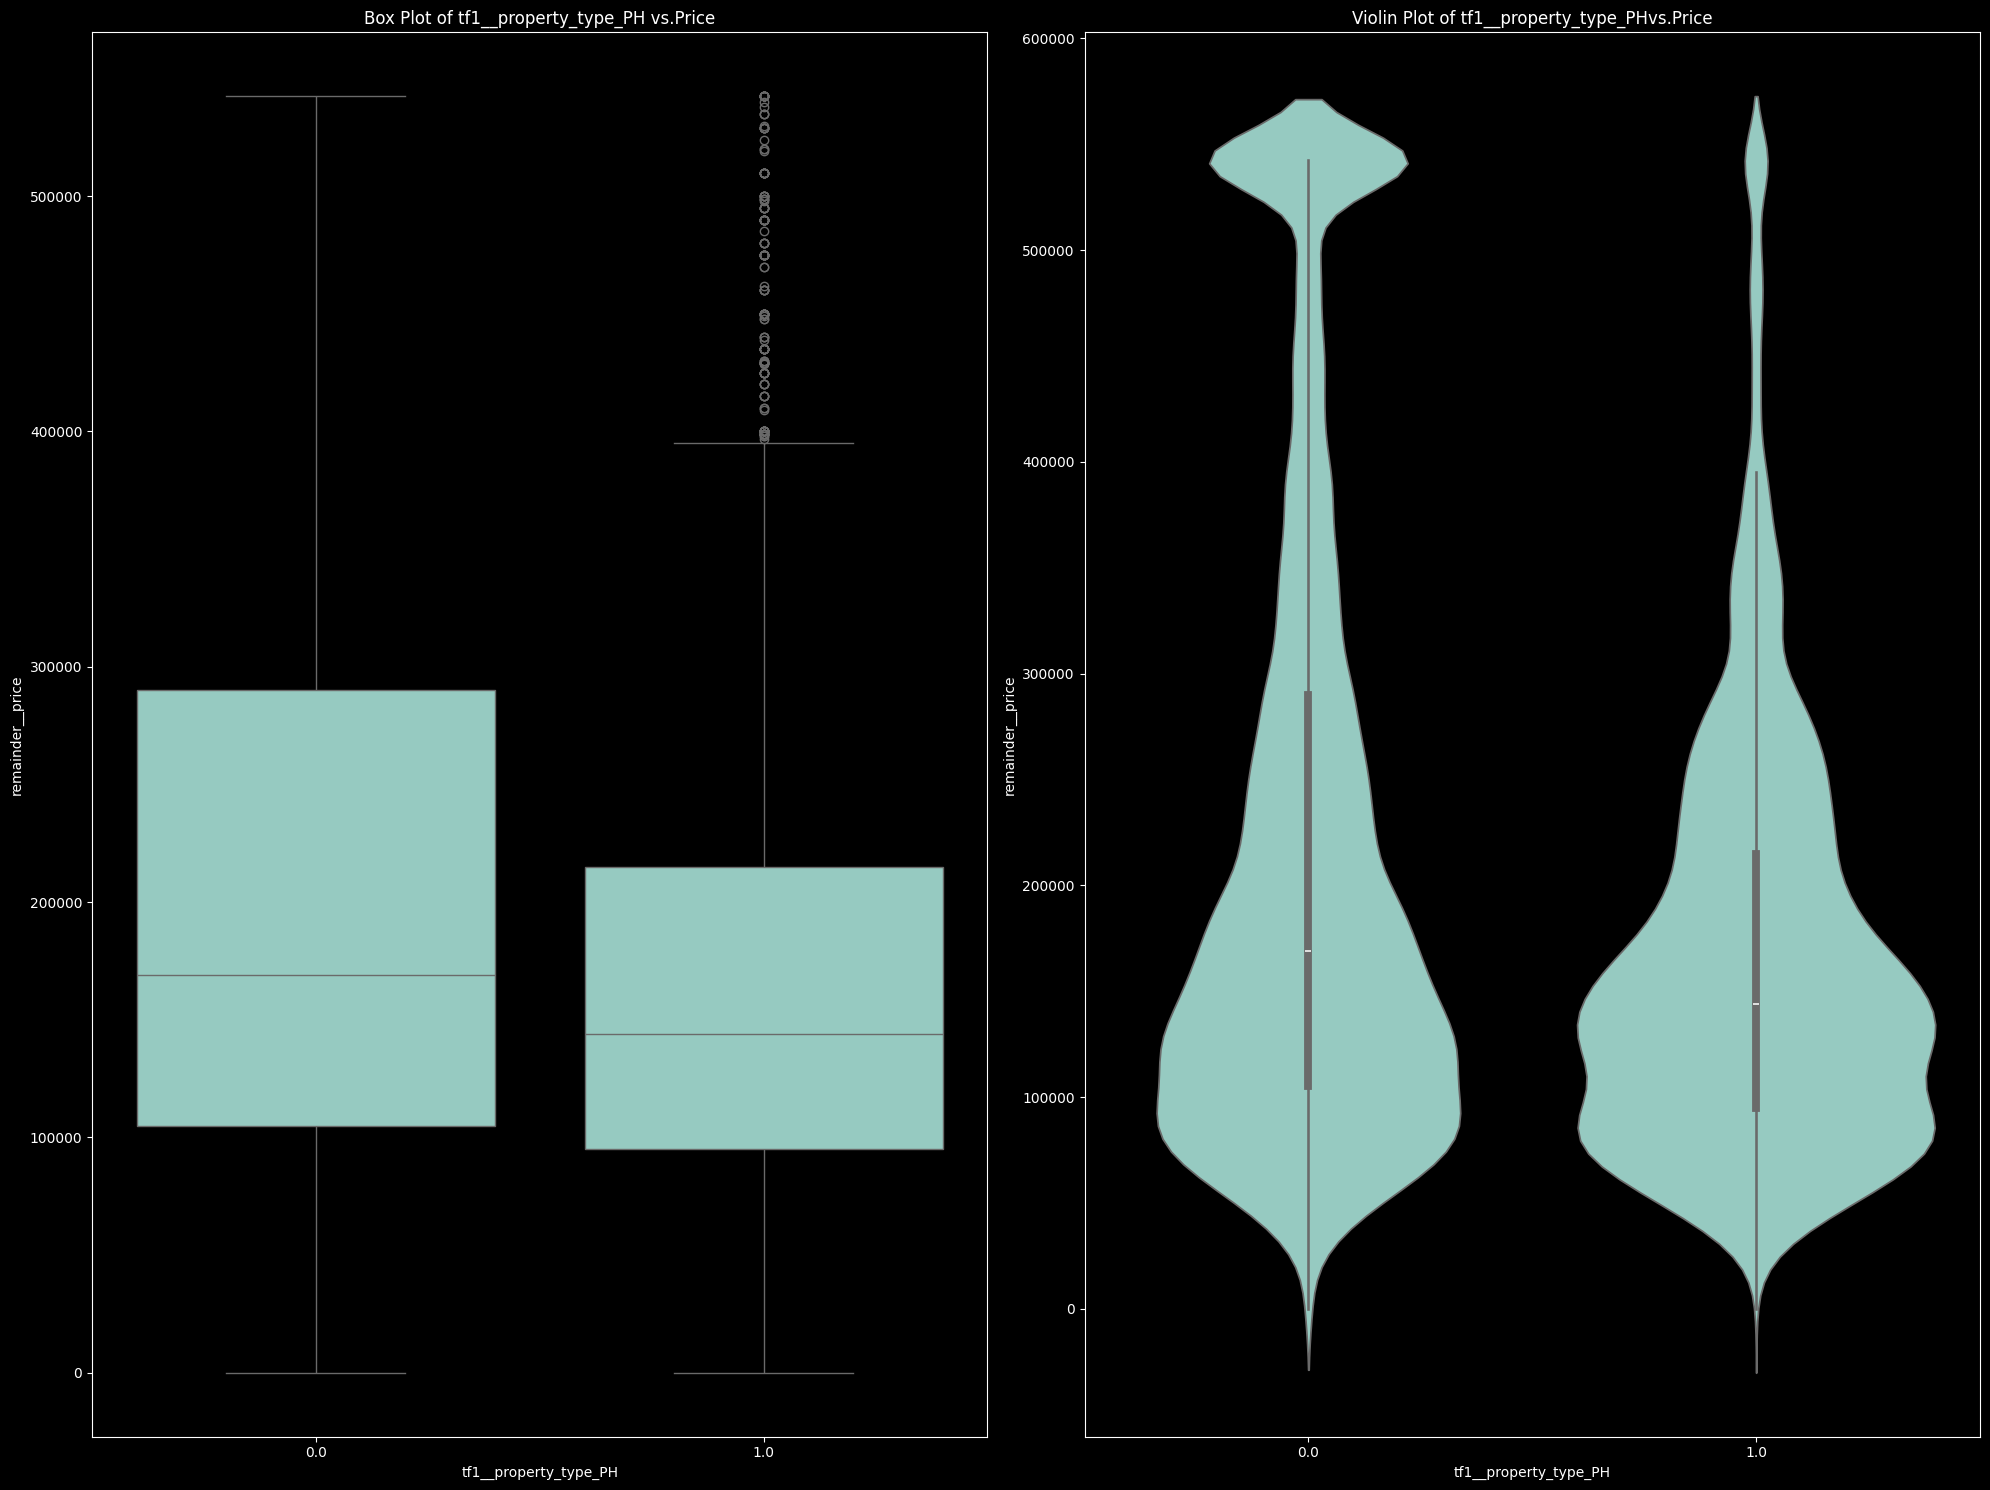

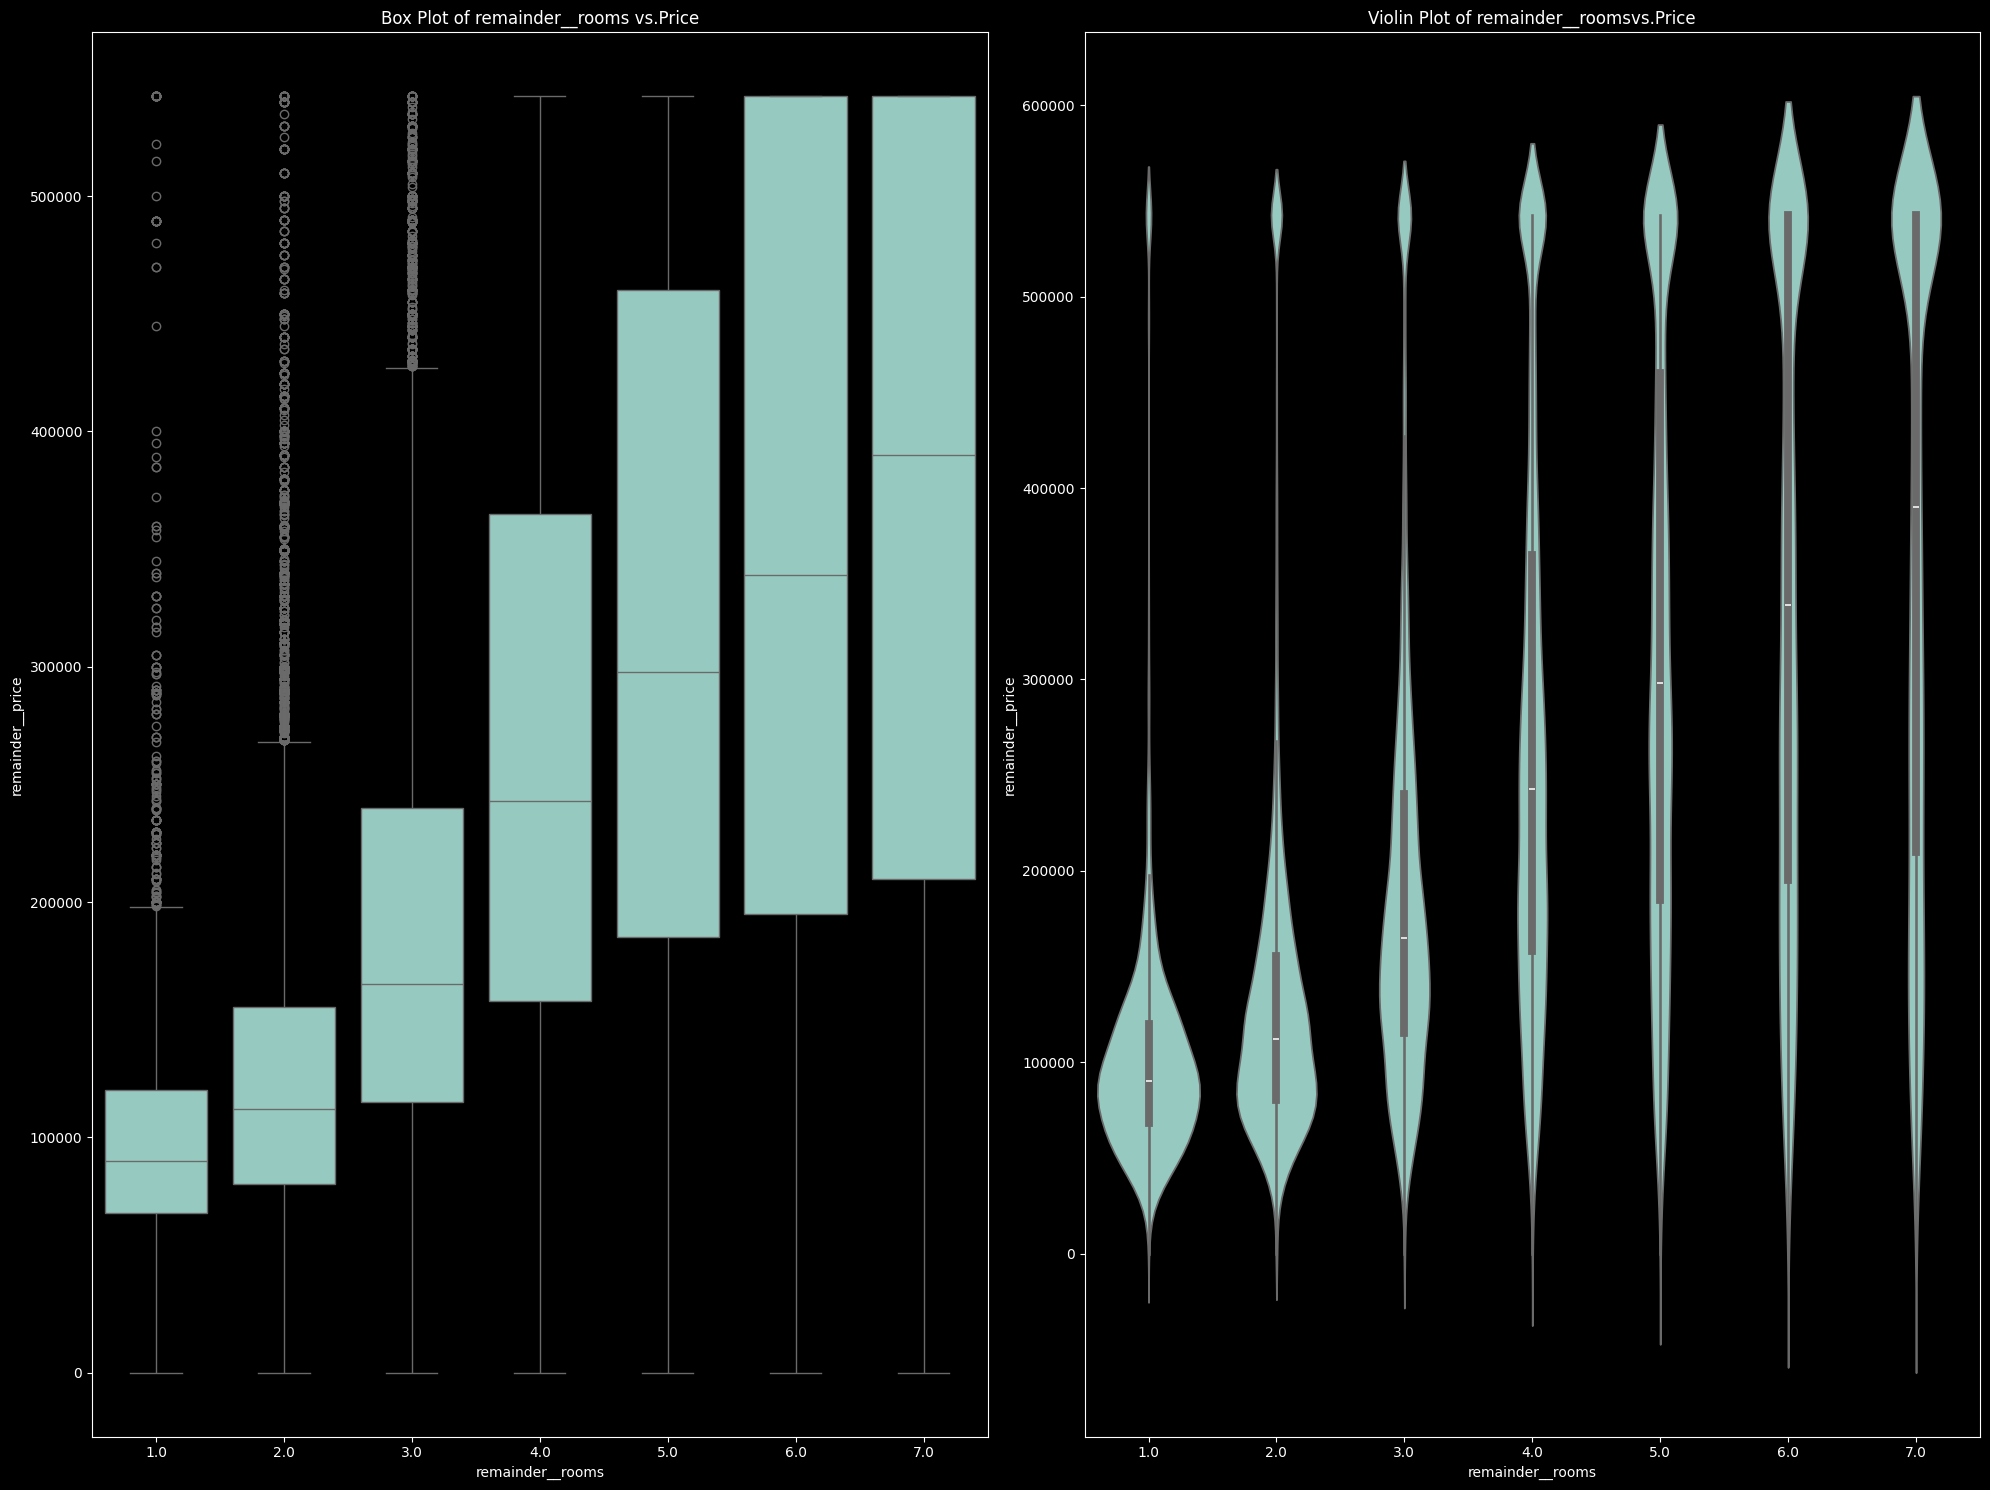

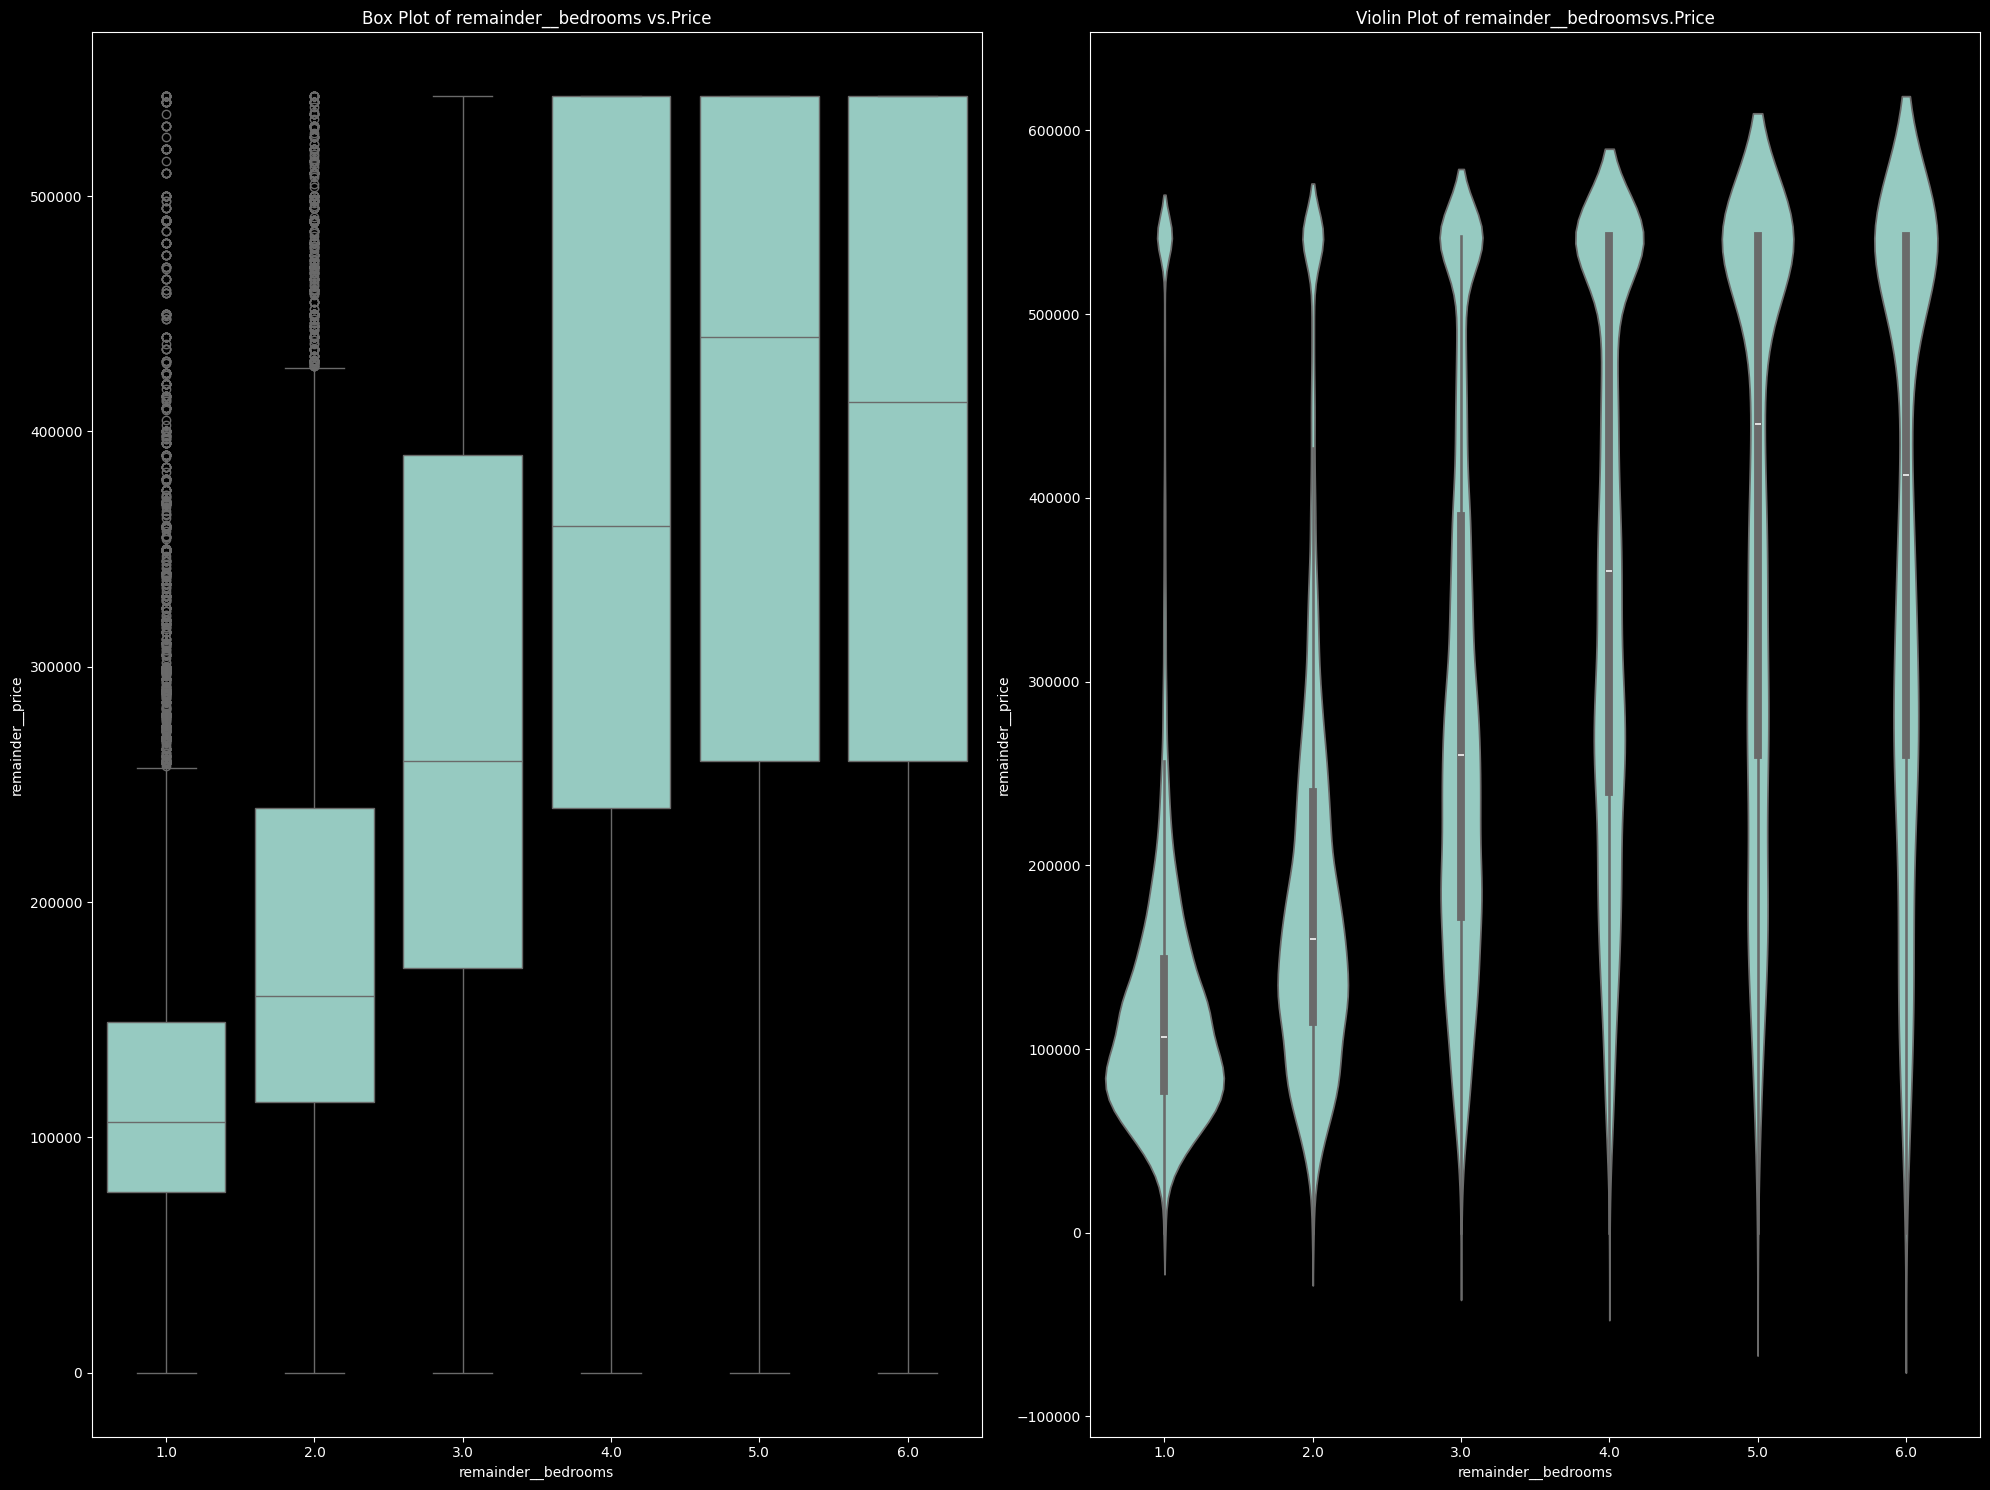

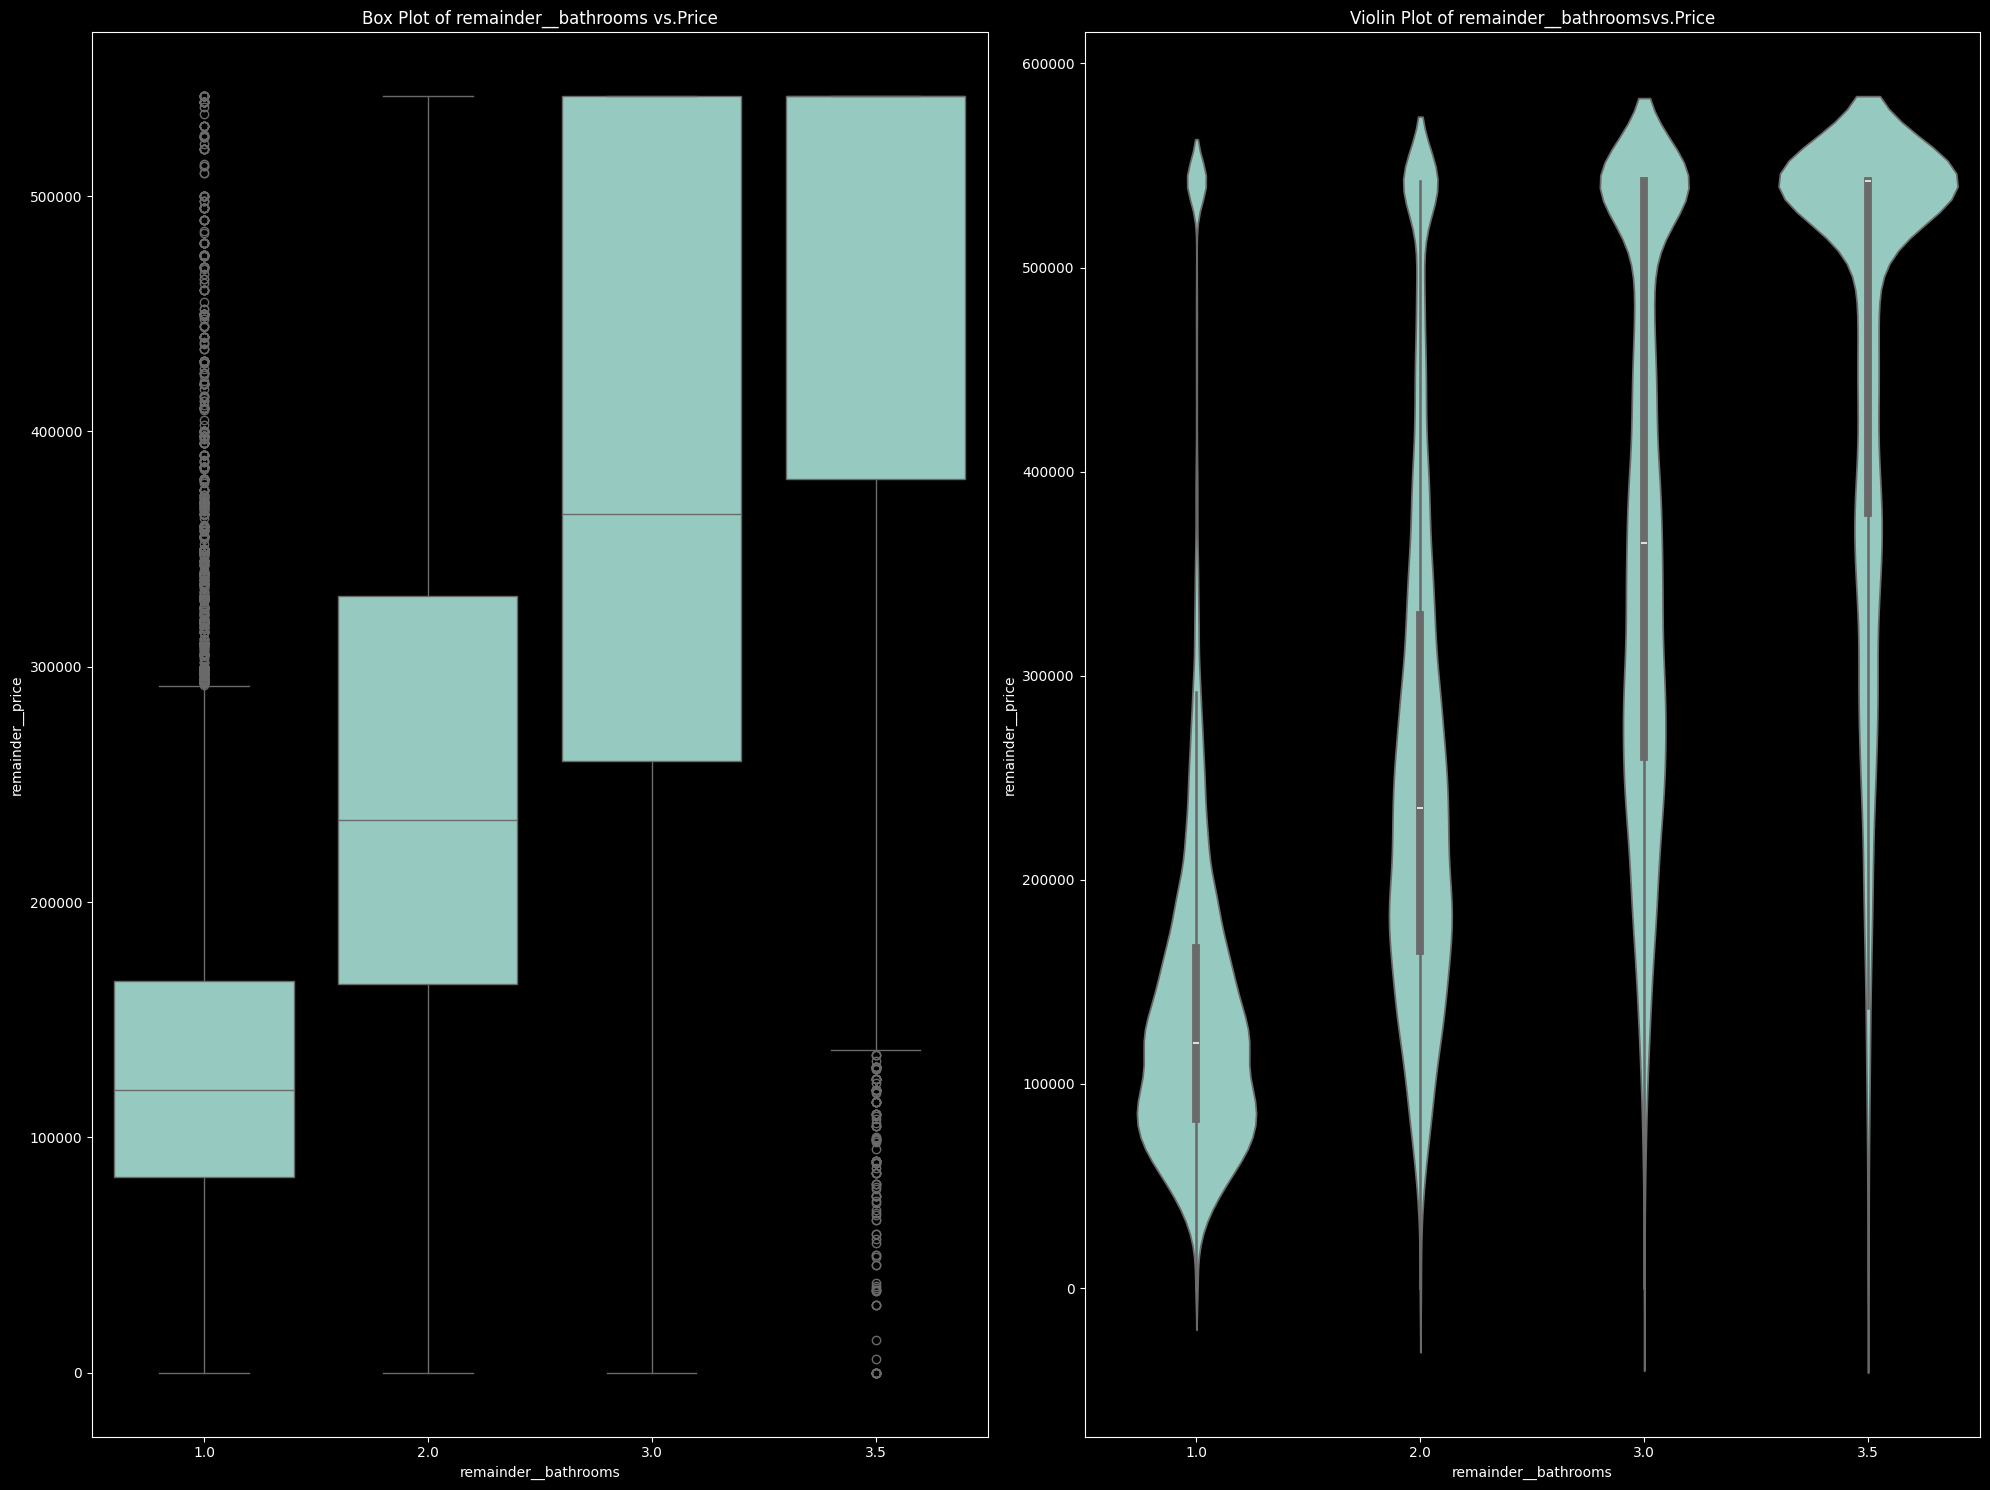

In [ ]:
X=df_outlier.drop(columns=['remainder__price','remainder__surface_total','remainder__surface_covered'])
for col in X.columns:
    plt.figure(figsize=(20,15))

    # Box plot
    plt.subplot(1,2,1)
    sns.boxplot(data=df_outlier,x=col,y='remainder__price')
    plt.title(f'Box Plot of {col} vs.Price')

    # Violin plot
    plt.subplot(1,2,2)
    sns.violinplot(data=df_outlier,x=col,y='remainder__price')
    plt.title(f'Violin Plot of {col}vs.Price')

    plt.tight_layout()
    plt.show()

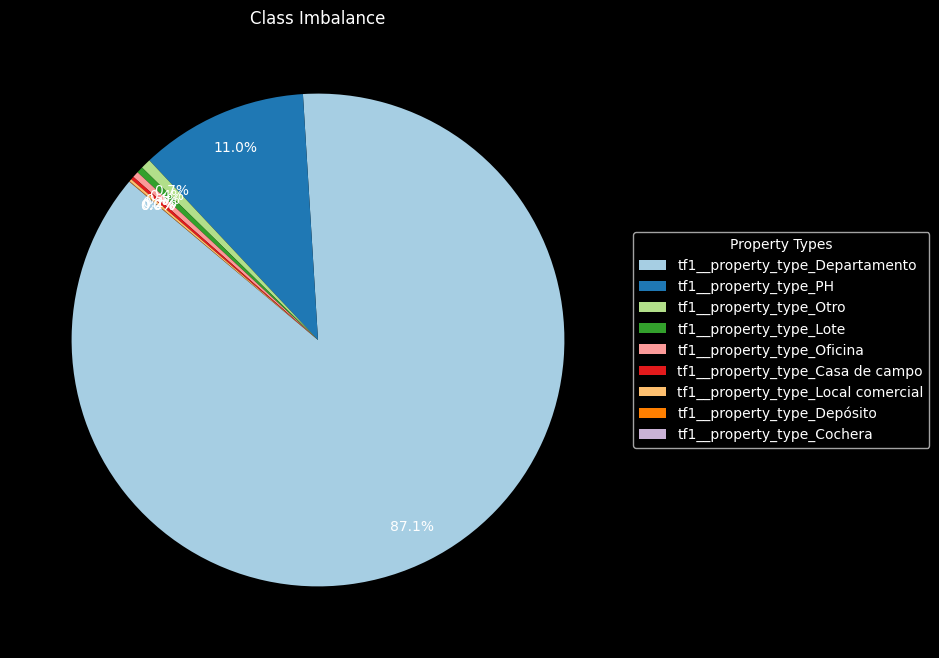

In [ ]:
property_type_columns=['tf1__property_type_Casa de campo','tf1__property_type_Cochera','tf1__property_type_Departamento','tf1__property_type_Depósito','tf1__property_type_Local comercial','tf1__property_type_Lote','tf1__property_type_Oficina','tf1__property_type_Otro','tf1__property_type_PH'
]
class_counts=df_outlier[property_type_columns].sum().sort_values(ascending=False)
plt.figure(figsize=(10,8))
plt.pie(
    class_counts,
    labels=None,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors,
    pctdistance=0.85
)
plt.title('Class Imbalance')

plt.legend(class_counts.index,title="Property Types",loc="center left",bbox_to_anchor=(1,0,0.5,1))

plt.show()


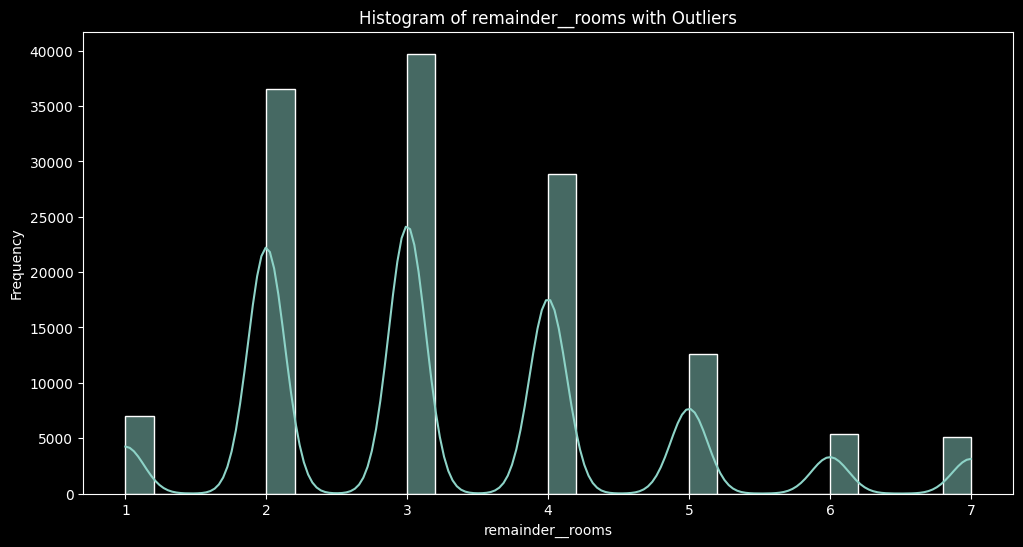

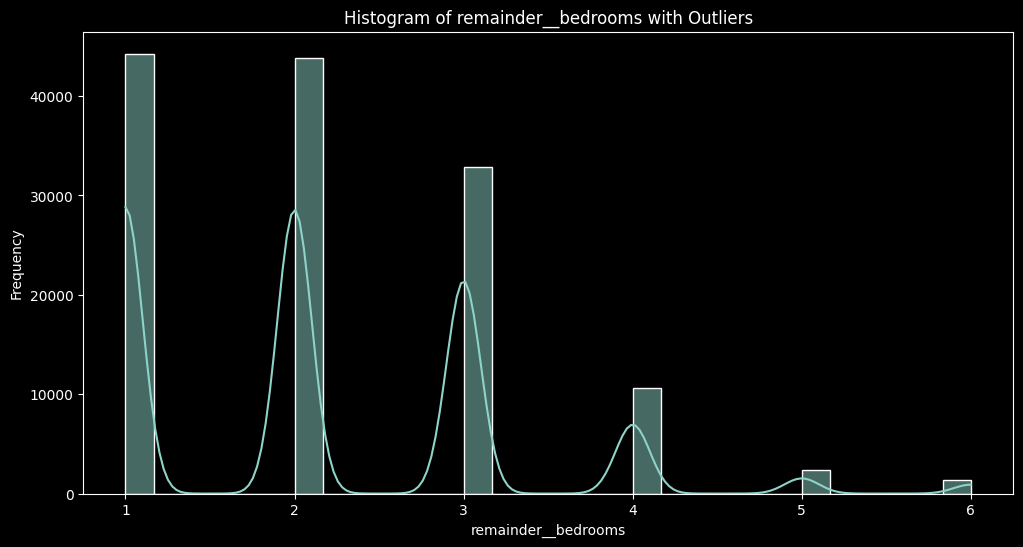

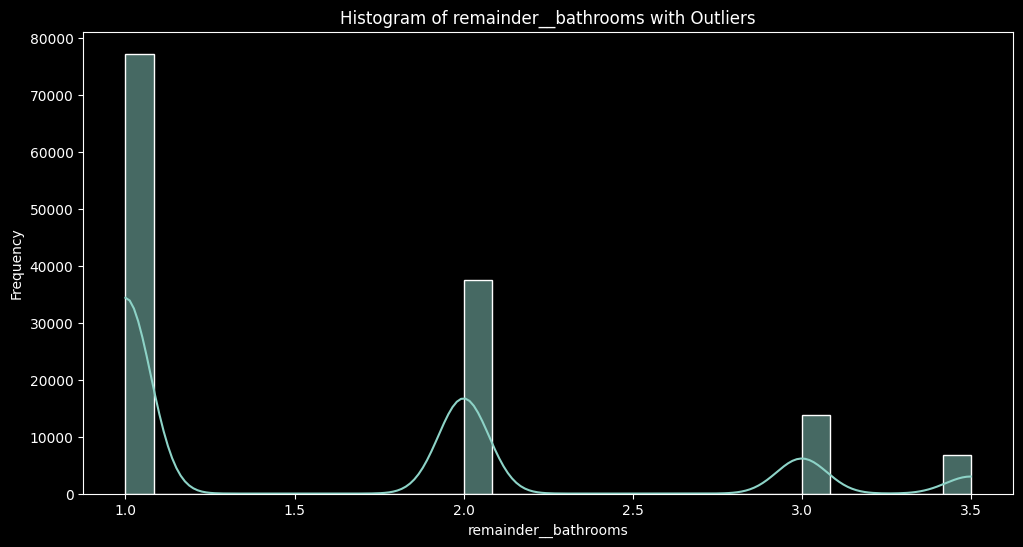

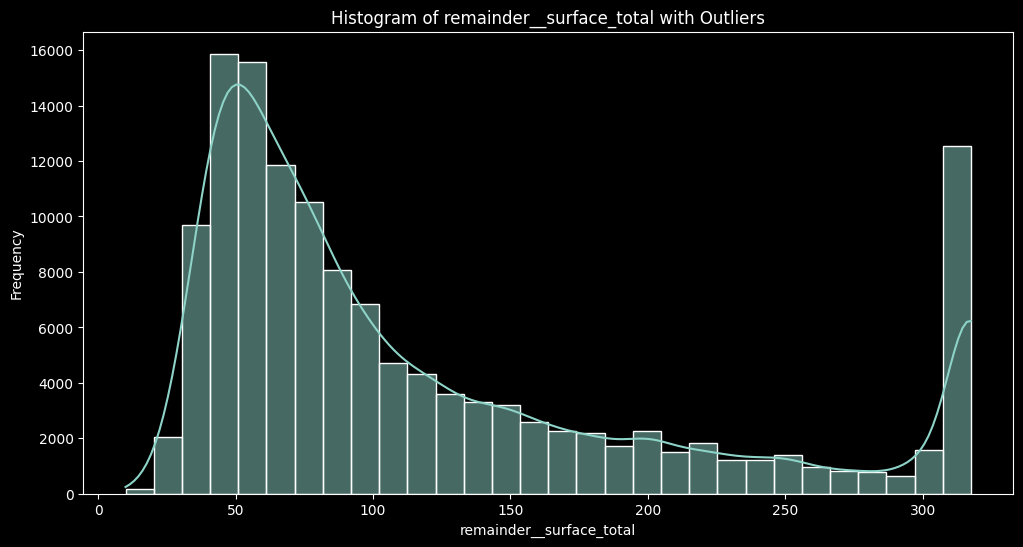

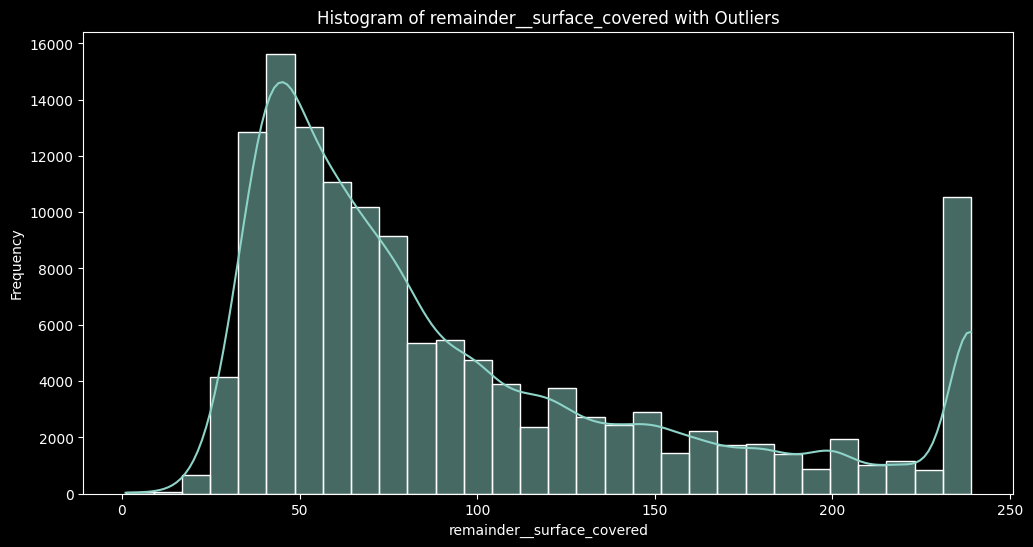

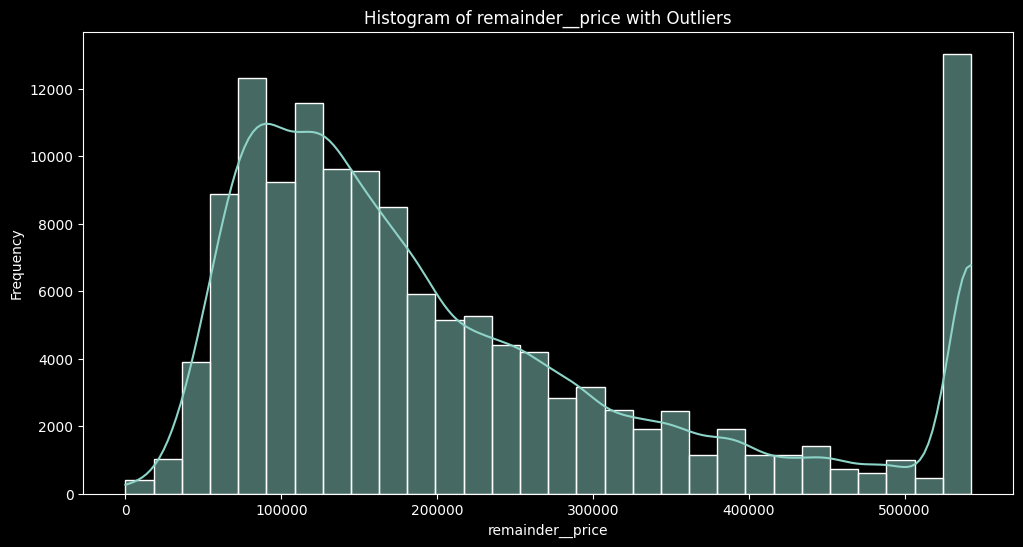

In [ ]:
for column in outlier_columns:
    plt.figure(figsize=(12, 6))
    sns.histplot(df_outlier[column], bins=30, kde=True)
    plt.title(f"Histogram of {column} with Outliers")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

In [ ]:
# Hypothesis 3: Surface Area is Positively Correlated with Price(t-test)
import scipy.stats as stats
corr_surface_total,p_value_total=stats.pearsonr(df_outlier['remainder__surface_total'],df_outlier['remainder__price'])
corr_surface_covered,p_value_covered=stats.pearsonr(df_outlier['remainder__surface_covered'],df_outlier['remainder__price'])
print("Correlation between surface_total and price:",corr_surface_total)
print("p-value for surface_total and price:",p_value_total)
print("Correlation between surface_covered and price:",corr_surface_covered)
print("p-value for surface_covered and price:",p_value_covered)




Correlation between surface_total and price: 0.5188878815474423
p-value for surface_total and price: 0.0
Correlation between surface_covered and price: 0.6273394386935999
p-value for surface_covered and price: 0.0


In [ ]:
# Hypothesis 4: Number of Rooms and Bedrooms Affects Price
import statsmodels.api as sm

rooms=sm.add_constant(df_outlier['remainder__rooms'])
model_rooms=sm.OLS(df_outlier['remainder__price'],rooms).fit()
print("Linear regression results for rooms and price:")
print(model_rooms.summary())

bedrooms=sm.add_constant(df_outlier['remainder__bedrooms'])
model_bedrooms =sm.OLS(df_outlier['remainder__price'],bedrooms).fit()
print("\nLinear regression results for bedrooms and price:")
print(model_bedrooms.summary())



Linear regression results for rooms and price:
                            OLS Regression Results                            
Dep. Variable:       remainder__price   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                 4.395e+04
Date:                Fri, 29 Nov 2024   Prob (F-statistic):               0.00
Time:                        11:10:13   Log-Likelihood:            -1.7831e+06
No. Observations:              135300   AIC:                         3.566e+06
Df Residuals:                  135298   BIC:                         3.566e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [ ]:
# Hypothesis 5: Properties with Higher Bathroom Counts are More Expensive
# Perform ANOVA for different bathroom counts
price_by_bathroom=[df_outlier[df_outlier['remainder__bathrooms']==bc]['remainder__price'] for bc in df_outlier['remainder__bathrooms'].unique()]
anova_result_bathrooms=stats.f_oneway(*price_by_bathroom)

print("ANOVA test for bathroom count and price:")
print("F-statistic:",anova_result_bathrooms.statistic)
print("p-value:",anova_result_bathrooms.pvalue)




ANOVA test for bathroom count and price:
F-statistic: 32468.32650404341
p-value: 0.0


In [ ]:
from scipy.stats import f_oneway

df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ar_properties.csv")

df=df[df['price']>=0].dropna(subset=['price','property_type'])

price_by_property_type = [df[df['property_type']==pt]['price'] for pt in df['property_type'].unique()]

f_stat,p_value=f_oneway(*price_by_property_type)

print("F-statistic:",f_stat)
print("p-value:",p_value)










F-statistic: 2.357985735499167
p-value: 0.011701535053368697


In [ ]:
df_outlier['bathroom_room_ratio'] = df_outlier['remainder__bathrooms'] / (df_outlier['remainder__rooms'] + 1)

df_outlier['surface_ratio'] = df_outlier['remainder__surface_covered'] / (df_outlier['remainder__surface_total'] + 1)



tf1__property_type_Casa de campo  tf1__property_type_Cochera  \
3                                0.0                         0.0   
38                               0.0                         0.0   
46                               0.0                         0.0   
47                               0.0                         0.0   
48                               0.0                         0.0   

    tf1__property_type_Departamento  tf1__property_type_Depósito  \
3                               0.0                          0.0   
38                              1.0                          0.0   
46                              0.0                          0.0   
47                              0.0                          0.0   
48                              0.0                          0.0   

    tf1__property_type_Local comercial  tf1__property_type_Lote  \
3                                  0.0                      0.0   
38                                 0.0                      0.0   
46                                 0.0                      0.0   
47                                 0.0                      0.0   
48                                 0.0                      1.0   

    tf1__property_type_Oficina  tf1__property_type_Otro  \
3                          0.0                      0.0   
38                         0.0                      0.0   
46                         0.0                      0.0   
47                         0.0                      0.0   
48                         0.0                      0.0   

    tf1__property_type_PH  remainder__rooms  remainder__bedrooms  \
3                     0.0               6.0                  2.0   
38                    0.0               1.0                  1.0   
46                    1.0               2.0                  1.0   
47                    0.0               2.0                  1.0   
48                    0.0               2.0                  1.0   

    remainder__bathrooms  remainder__surface_total  \
3                    1.0                     250.0   
38                   1.0                      30.0   
46                   1.0                      75.0   
47                   1.0                     317.5   
48                   1.0                     317.5   

    remainder__surface_covered  remainder__price  bathroom_room_ratio  \
3                        130.0          542500.0             0.142857   
38                        30.0           95000.0             0.500000   
46                        42.0           59000.0             0.333333   
47                        49.0           65000.0             0.333333   
48                       239.0           89000.0             0.333333   

    surface_ratio  
3        0.517928  
38       0.967742  
46       0.552632  
47       0.153846  
48       0.750392

In [ ]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
import time

# Split data into features (X) and target (y)
X = df_outlier.drop(columns=['remainder__price'])  # All columns except price
y = df_outlier['remainder__price']  # Target column

# Apply StandardScaler to the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a smaller dataset (10% of the original)
X_small, _, y_small, _ = train_test_split(X_scaled, y, test_size=0.9, random_state=42)

# Split full dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Split smaller dataset into train and test sets
X_train_small, X_test_small, y_train_small, y_test_small = train_test_split(X_small, y_small, test_size=0.2, random_state=42)

# Initialize models
models = {
    'XGBoost Regressor': XGBRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'CatBoost Regressor': CatBoostRegressor(verbose=0, random_state=42)
}

# Train and evaluate models on both datasets
results = []

for model_name, model in models.items():
    # Measure training time for full dataset
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time_full = time.time() - start_time

    # Measure testing time for full dataset
    start_time = time.time()
    y_pred_test_full = model.predict(X_test)
    test_time_full = time.time() - start_time

    # Predict on training data
    y_pred_train_full = model.predict(X_train)

    # Calculate R² and MAE for the full dataset
    r2_train_full = r2_score(y_train, y_pred_train_full)
    r2_test_full = r2_score(y_test, y_pred_test_full)
    mae_train_full = mean_absolute_error(y_train, y_pred_train_full)
    mae_test_full = mean_absolute_error(y_test, y_pred_test_full)

    # Measure training time for smaller dataset
    start_time = time.time()
    model.fit(X_train_small, y_train_small)
    train_time_small = time.time() - start_time

    # Measure testing time for smaller dataset
    start_time = time.time()
    y_pred_test_small = model.predict(X_test_small)
    test_time_small = time.time() - start_time

    # Predict on training data (small dataset)
    y_pred_train_small = model.predict(X_train_small)

    # Calculate R² and MAE for the smaller dataset
    r2_train_small = r2_score(y_train_small, y_pred_train_small)
    r2_test_small = r2_score(y_test_small, y_pred_test_small)
    mae_train_small = mean_absolute_error(y_train_small, y_pred_train_small)
    mae_test_small = mean_absolute_error(y_test_small, y_pred_test_small)

    # Append results
    results.append({
        'Model': model_name,
        'Full Train R^2': r2_train_full,
        'Full Test R^2': r2_test_full,
        'Full Train MAE': mae_train_full,
        'Full Test MAE': mae_test_full,
        'Full Train Time (s)': train_time_full,
        'Full Test Time (s)': test_time_full,
        'Small Train R^2': r2_train_small,
        'Small Test R^2': r2_test_small,
        'Small Train MAE': mae_train_small,
        'Small Test MAE': mae_test_small,
        'Small Train Time (s)': train_time_small,
        'Small Test Time (s)': test_time_small
    })

# Convert results to DataFrame for easy comparison
results_df = pd.DataFrame(results)

# Display results
print(results_df)


                     Model  Full Train R^2  Full Test R^2  Full Train MAE  \
0        XGBoost Regressor        0.664120       0.628049    57521.271518   
1  Random Forest Regressor        0.793153       0.633709    40468.268010   
2       CatBoost Regressor        0.648077       0.626022    58993.538130   

   Full Test MAE  Full Train Time (s)  Full Test Time (s)  Small Train R^2  \
0   59810.140425             8.353692            0.056820         0.740644   
1   56002.204825            33.900970            1.088873         0.837559   
2   60186.413816            17.625466            0.157283         0.679593   

   Small Test R^2  Small Train MAE  Small Test MAE  Small Train Time (s)  \
0        0.561125     49910.723213    62699.900305              0.233177   
1        0.529889     36355.849886    63894.246892              3.424125   
2        0.586451     56366.480912    61306.676985              5.263153   

   Small Test Time (s)  
0             0.008747  
1             0.070183 